In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


#sklearn
import sklearn
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report, confusion_matrix

In [2]:
dataset = pd.read_csv("data/crop_yield.csv")

In [3]:
dataset.head()

Crop  Crop_Year       Season  State     Area  Production  \
0      Arecanut       1997  Whole Year   Assam  73814.0       56708   
1     Arhar/Tur       1997  Kharif       Assam   6637.0        4685   
2   Castor seed       1997  Kharif       Assam    796.0          22   
3      Coconut        1997  Whole Year   Assam  19656.0   126905000   
4  Cotton(lint)       1997  Kharif       Assam   1739.0         794   

   Annual_Rainfall  Fertilizer  Pesticide        Yield  
0           2051.4  7024878.38   22882.34     0.796087  
1           2051.4   631643.29    2057.47     0.710435  
2           2051.4    75755.32     246.76     0.238333  
3           2051.4  1870661.52    6093.36  5238.051739  
4           2051.4   165500.63     539.09     0.420909

In [4]:
dataset.tail()

Crop  Crop_Year       Season              State      Area  \
19684  Small millets       1998  Kharif                Nagaland    4000.0   
19685          Wheat       1998  Rabi                  Nagaland    1000.0   
19686          Maize       1997  Kharif       Jammu and Kashmir  310883.0   
19687           Rice       1997  Kharif       Jammu and Kashmir  275746.0   
19688          Wheat       1997  Rabi         Jammu and Kashmir  239344.0   

       Production  Annual_Rainfall   Fertilizer  Pesticide     Yield  
19684        2000           1498.0    395200.00    1160.00  0.500000  
19685        3000           1498.0     98800.00     290.00  3.000000  
19686      440900           1356.2  29586735.11   96373.73  1.285000  
19687        5488           1356.2  26242746.82   85481.26  0.016667  
19688      392160           1356.2  22778368.48   74196.64  1.261818

In [5]:
dataset.describe()

Crop_Year          Area    Production  Annual_Rainfall  \
count  19689.000000  1.968900e+04  1.968900e+04     19689.000000   
mean    2009.127584  1.799266e+05  1.643594e+07      1437.755177   
std        6.498099  7.328287e+05  2.630568e+08       816.909589   
min     1997.000000  5.000000e-01  0.000000e+00       301.300000   
25%     2004.000000  1.390000e+03  1.393000e+03       940.700000   
50%     2010.000000  9.317000e+03  1.380400e+04      1247.600000   
75%     2015.000000  7.511200e+04  1.227180e+05      1643.700000   
max     2020.000000  5.080810e+07  6.326000e+09      6552.700000   

         Fertilizer     Pesticide         Yield  
count  1.968900e+04  1.968900e+04  19689.000000  
mean   2.410331e+07  4.884835e+04     79.954009  
std    9.494600e+07  2.132874e+05    878.306193  
min    5.417000e+01  9.000000e-02      0.000000  
25%    1.880146e+05  3.567000e+02      0.600000  
50%    1.234957e+06  2.421900e+03      1.030000  
75%    1.000385e+07  2.004170e+04      2.388889  
max    4.835407e+09  1.575051e+07  21105.000000

In [6]:
null_values = dataset.isnull().sum()
print(f"There are {null_values.sum()} missing values in the dataset")

There are 0 missing values in the dataset


In [7]:
duplicate_values = dataset.duplicated().sum()
print(f"There are {duplicate_values} duplicate values in the dataset")

There are 0 duplicate values in the dataset


In [8]:
dataset.dtypes

Crop                object
Crop_Year            int64
Season              object
State               object
Area               float64
Production           int64
Annual_Rainfall    float64
Fertilizer         float64
Pesticide          float64
Yield              float64
dtype: object

The Data types are correctly associated with their respective columsn

In [9]:
dataset["Crop_Year"].value_counts().sort_index()

Crop_Year
1997     410
1998     646
1999     650
2000     772
2001     750
2002     815
2003     801
2004     787
2005     811
2006     823
2007     828
2008     847
2009     865
2010     859
2011     907
2012     894
2013     976
2014     965
2015     998
2016    1036
2017    1070
2018    1063
2019    1079
2020      37
Name: count, dtype: int64

In [10]:
numerical_cols = dataset.select_dtypes(include=['float64', 'int64']).columns
categorical_cols = dataset.select_dtypes(include=['object', 'category']).columns

numerical_cols, categorical_cols

(Index(['Crop_Year', 'Area', 'Production', 'Annual_Rainfall', 'Fertilizer',
        'Pesticide', 'Yield'],
       dtype='object'),
 Index(['Crop', 'Season', 'State'], dtype='object'))

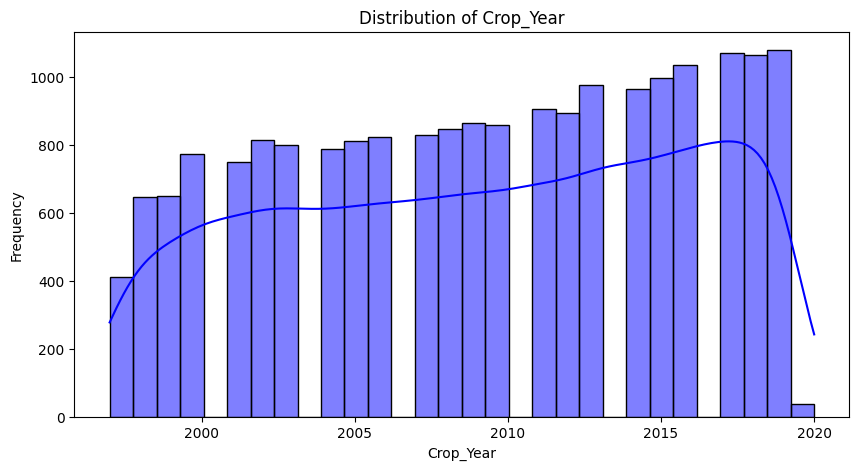

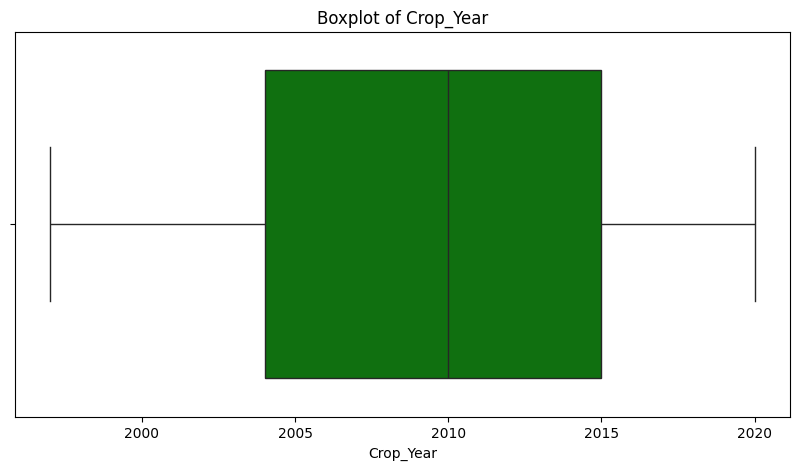

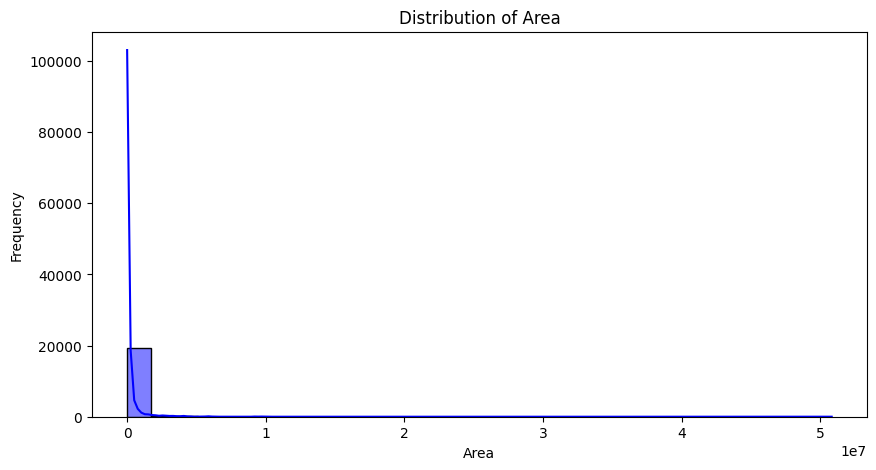

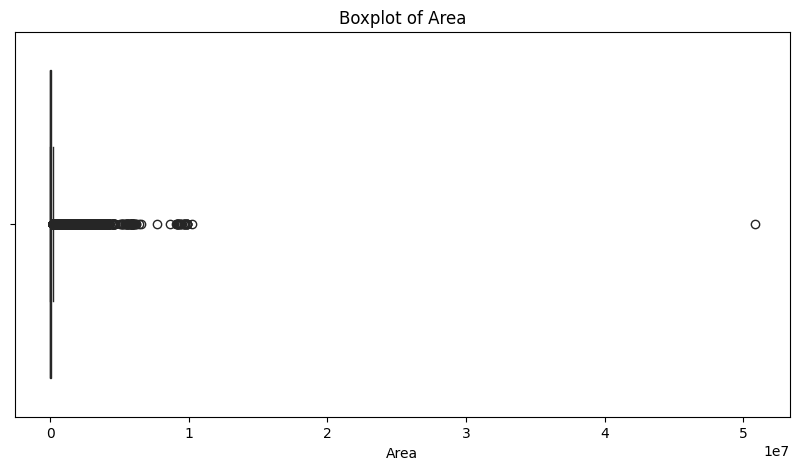

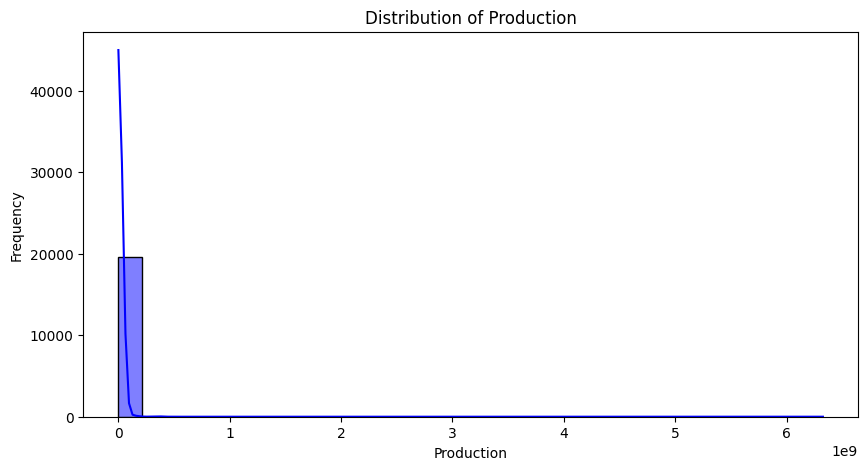

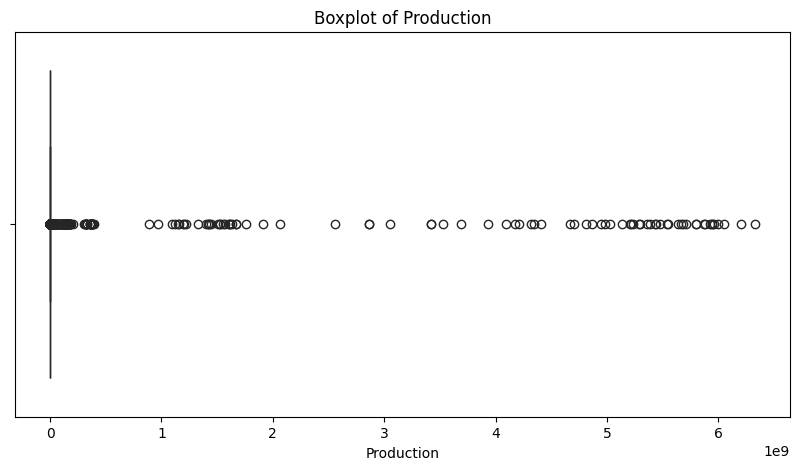

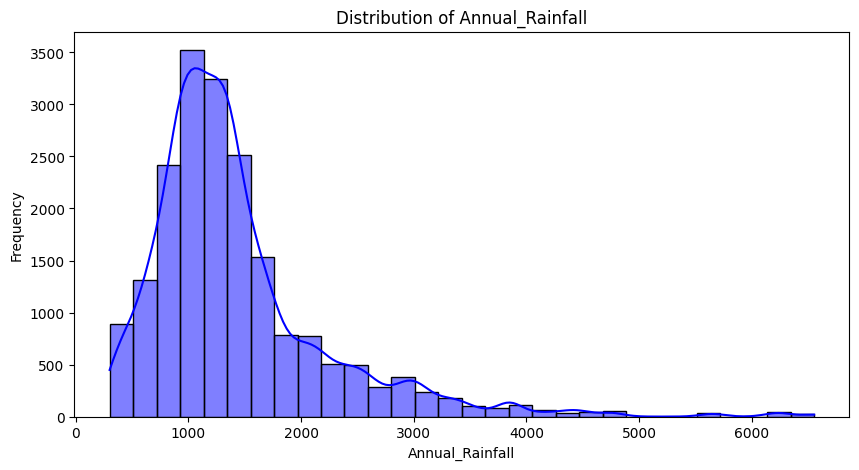

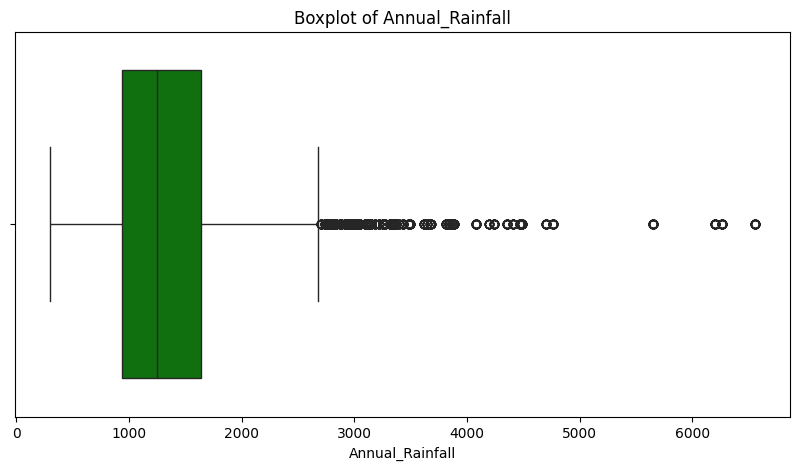

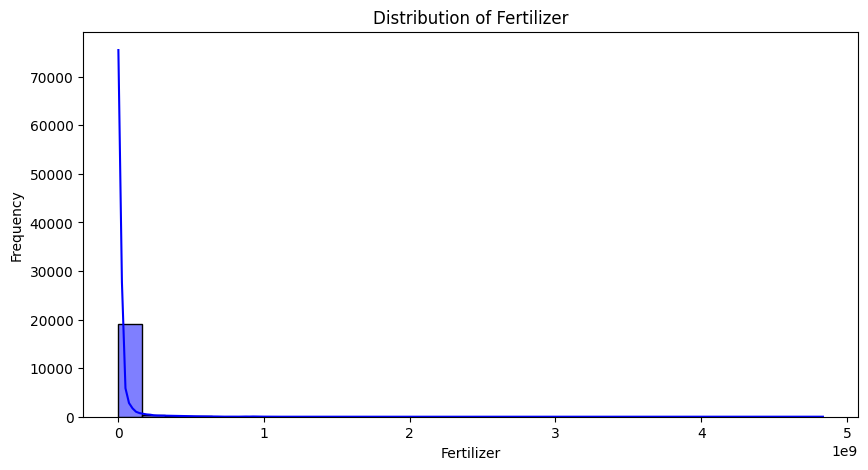

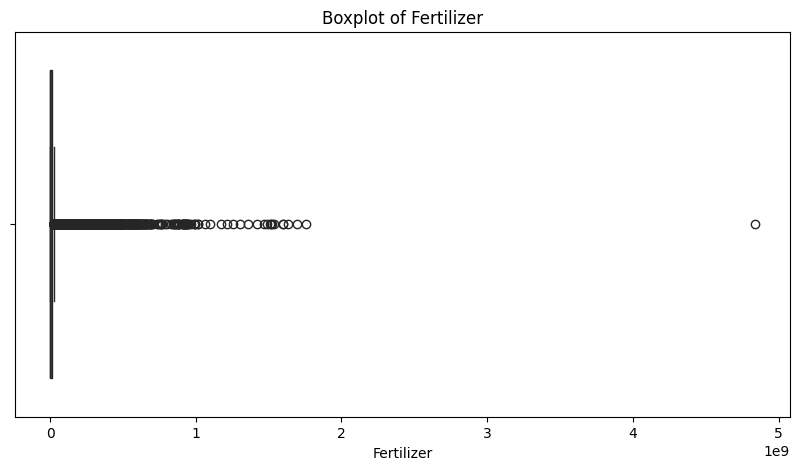

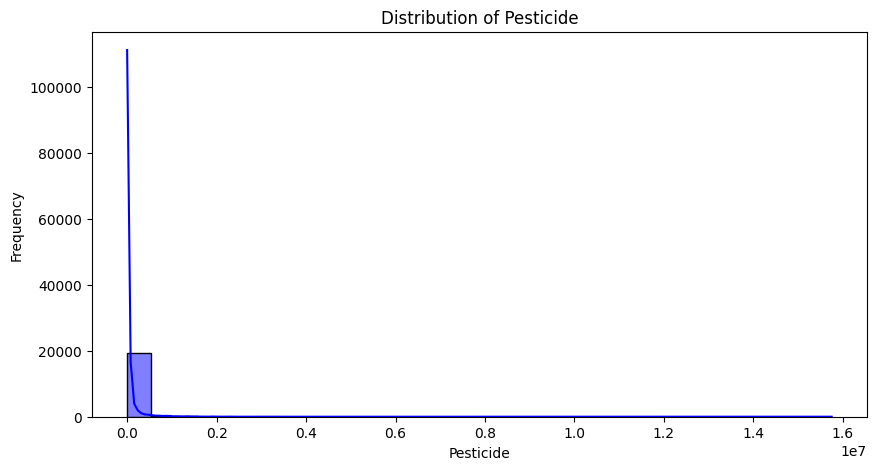

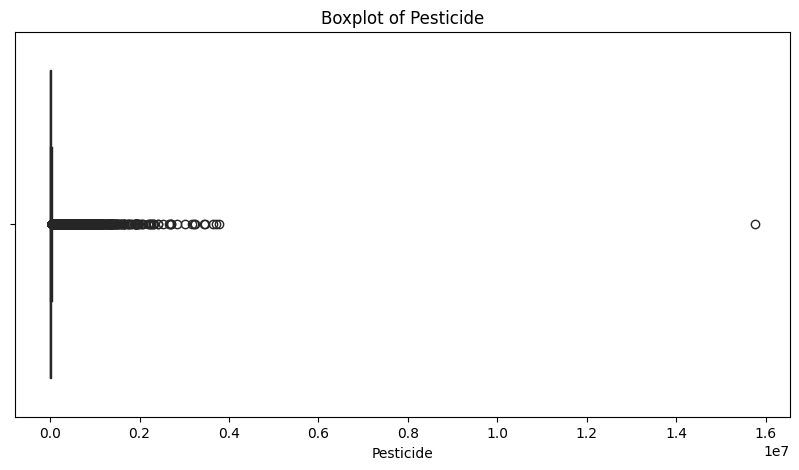

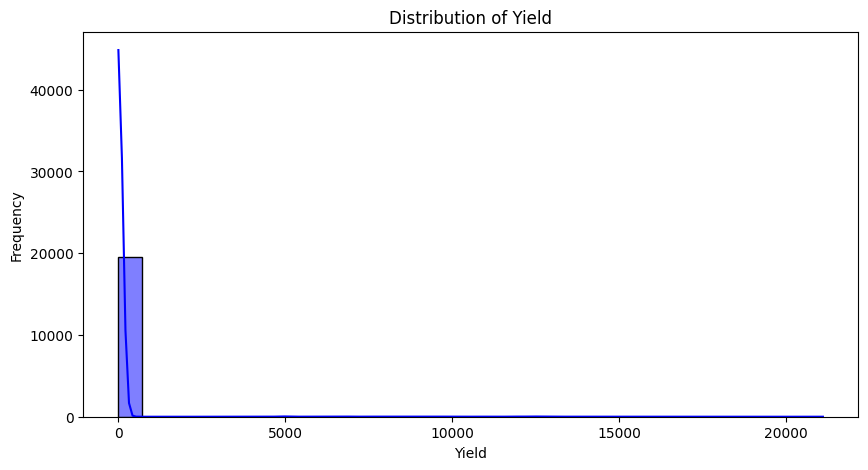

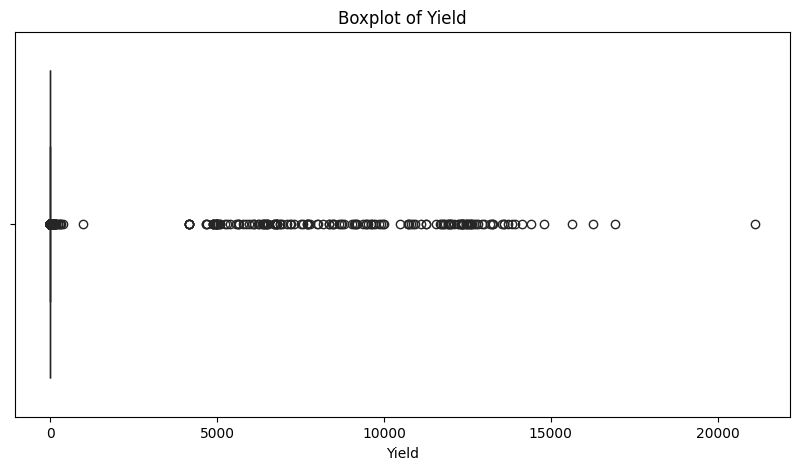

In [ ]:
for col in numerical_cols:
    plt.figure(figsize=(10, 5))
    sns.histplot(dataset[col], kde=True, bins=30, color='blue')
    plt.title(f'Distribution of {col}')
    plt.xlabel(col)
    plt.ylabel('Frequency')
    plt.show()
    
    plt.figure(figsize=(10, 5))
    sns.boxplot(x=dataset[col], color='green')
    plt.title(f'Boxplot of {col}')
    plt.xlabel(col)
    plt.show()


In [12]:
dataset.describe()

Crop_Year          Area    Production  Annual_Rainfall  \
count  19689.000000  1.968900e+04  1.968900e+04     19689.000000   
mean    2009.127584  1.799266e+05  1.643594e+07      1437.755177   
std        6.498099  7.328287e+05  2.630568e+08       816.909589   
min     1997.000000  5.000000e-01  0.000000e+00       301.300000   
25%     2004.000000  1.390000e+03  1.393000e+03       940.700000   
50%     2010.000000  9.317000e+03  1.380400e+04      1247.600000   
75%     2015.000000  7.511200e+04  1.227180e+05      1643.700000   
max     2020.000000  5.080810e+07  6.326000e+09      6552.700000   

         Fertilizer     Pesticide         Yield  
count  1.968900e+04  1.968900e+04  19689.000000  
mean   2.410331e+07  4.884835e+04     79.954009  
std    9.494600e+07  2.132874e+05    878.306193  
min    5.417000e+01  9.000000e-02      0.000000  
25%    1.880146e+05  3.567000e+02      0.600000  
50%    1.234957e+06  2.421900e+03      1.030000  
75%    1.000385e+07  2.004170e+04      2.388889  
max    4.835407e+09  1.575051e+07  21105.000000

Insights:

Crop year:  Mean = 2009.12
            Time Frame = 1997 to 2020
            Most of the data is from the period of 2007-20012

Area:       Mean = 179,926
            contains extream outliers

Production: Mean = 16,435,941
            contains scattered outliers

Annual_rainfall: Mean = 1437.8
                 A pretty standard distribution, but there exists areas with significantly high rainfall'

Fertilizer: Mean = 24,103,312
            Contains outliers

Pesticides: Mean = 48,848
            contains outliers quite similar to fertilizer

Yeild:      Mean: 79.95
            Extream Variance and outliers

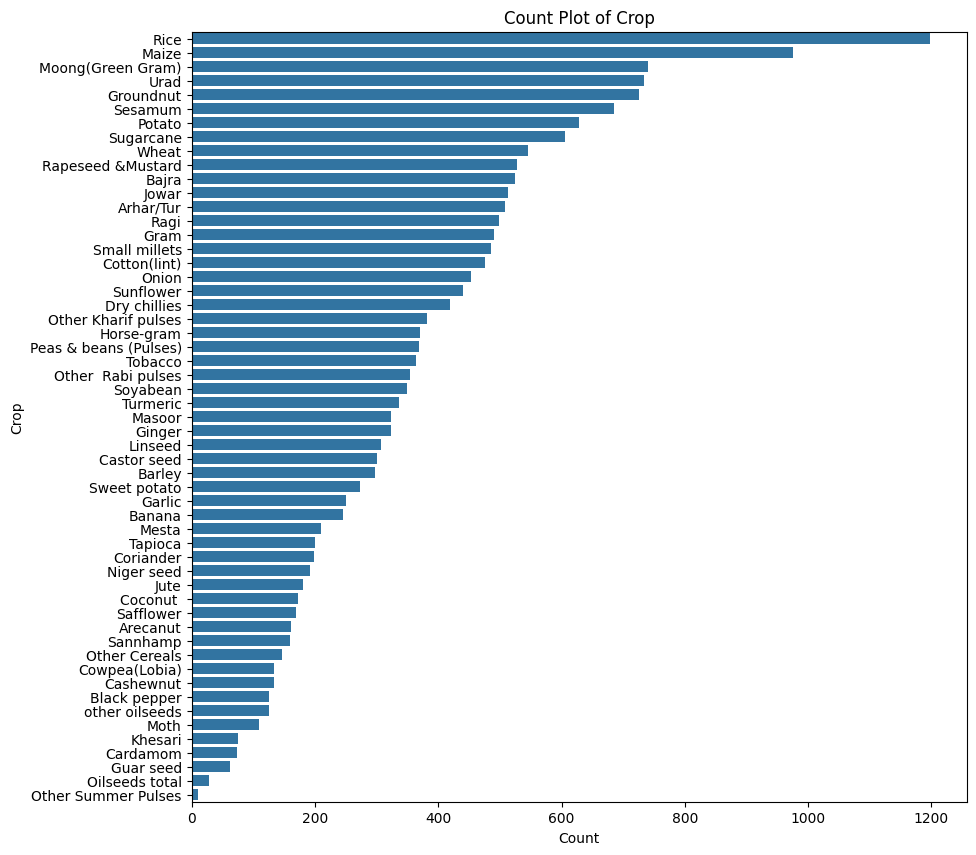

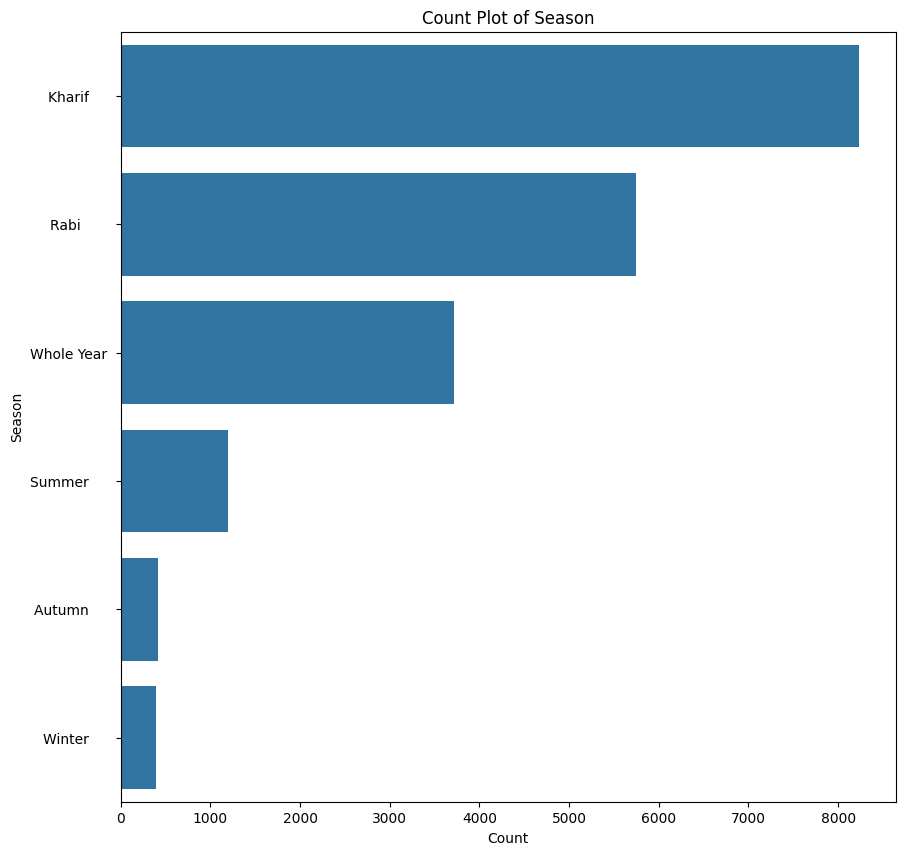

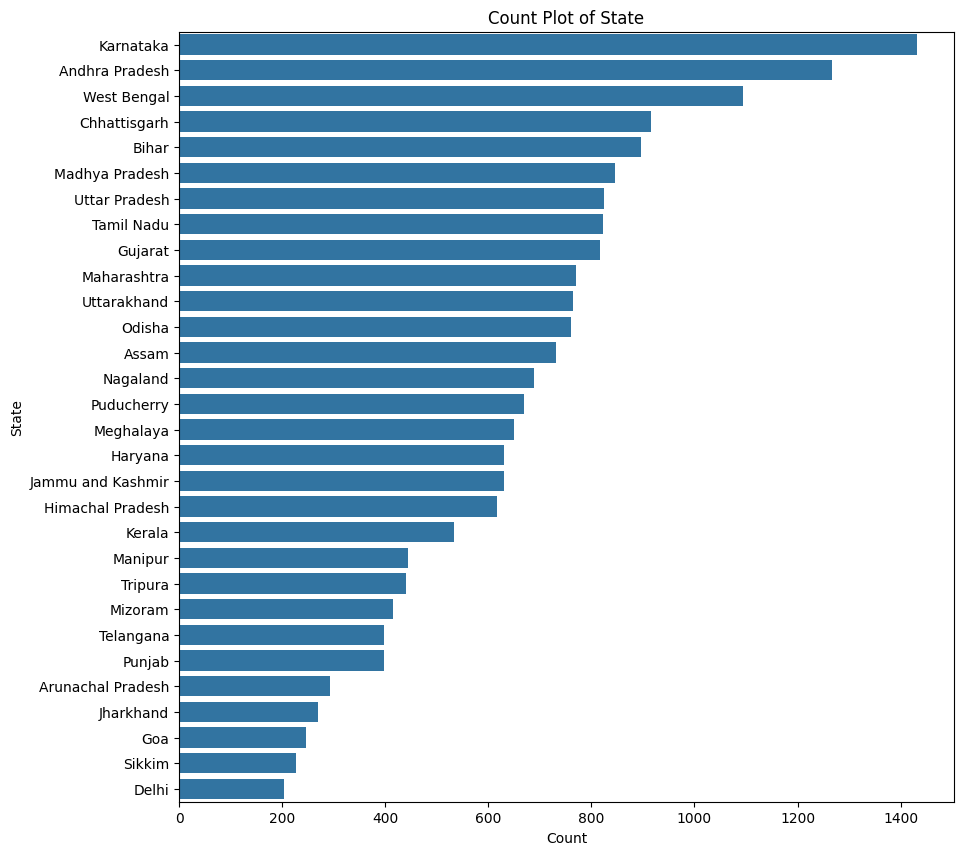

In [13]:
for col in categorical_cols:
    plt.figure(figsize=(10, 10))
    sns.countplot(y=dataset[col], order=dataset[col].value_counts().index)
    plt.title(f'Count Plot of {col}')
    plt.xlabel('Count')
    plt.ylabel(col)
    plt.show()

In [14]:
print(f"Ther are {len(dataset['Crop'].unique())} unique crops in the dataset")
print(f"Ther are {len(dataset['State'].unique())} unique states in the dataset")
print(f"There are {len(dataset['Season'].unique())} unique seasons in the dataset")

print(f"")

Ther are 55 unique crops in the dataset
Ther are 30 unique states in the dataset
There are 6 unique seasons in the dataset



Insight

Crop:  Unique Crops = 55
       Most Frequent Crop = Rice

Season: Unique Season = 6
        Most Frequent Season = Kharif

State:  UNique States = 30
        Most Frequent State = Karnataka

Correlation Mtrix

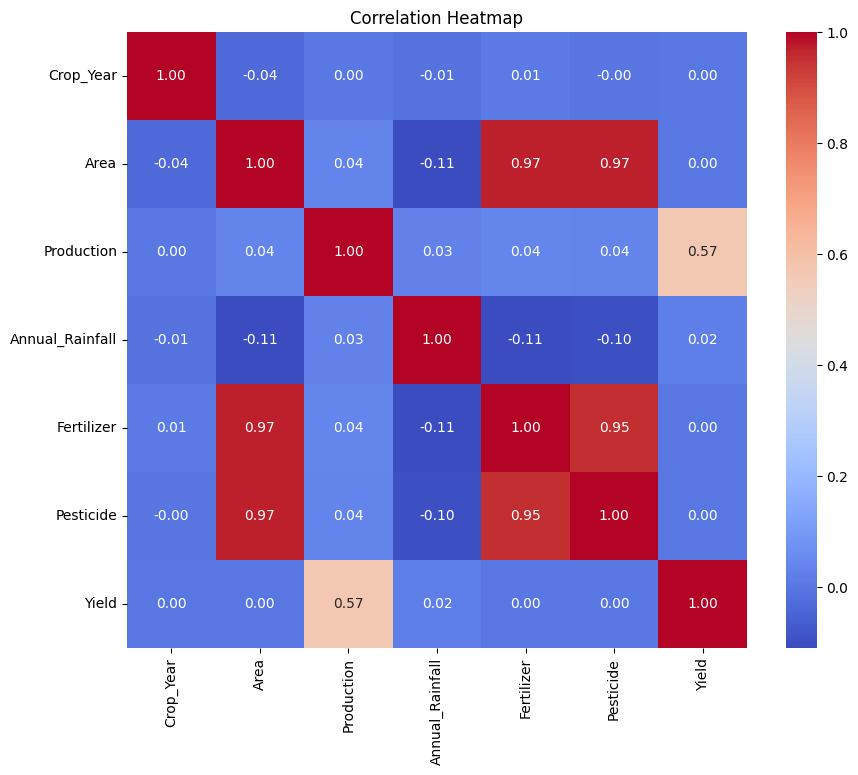

In [15]:
correlation_matrix = dataset[numerical_cols].corr()
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Heatmap')
plt.show()

Numerical - Numerical

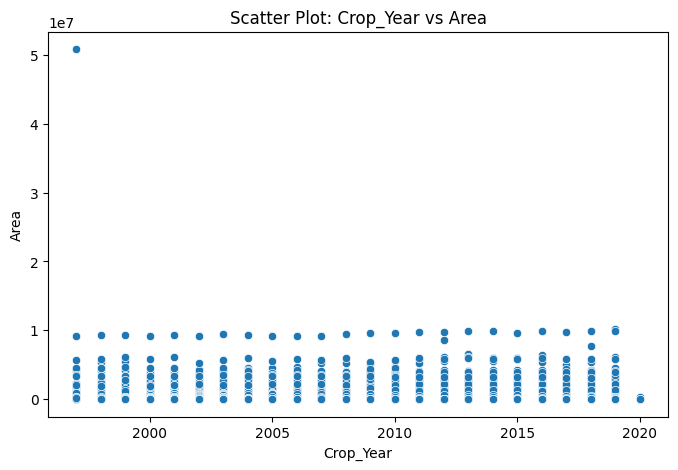

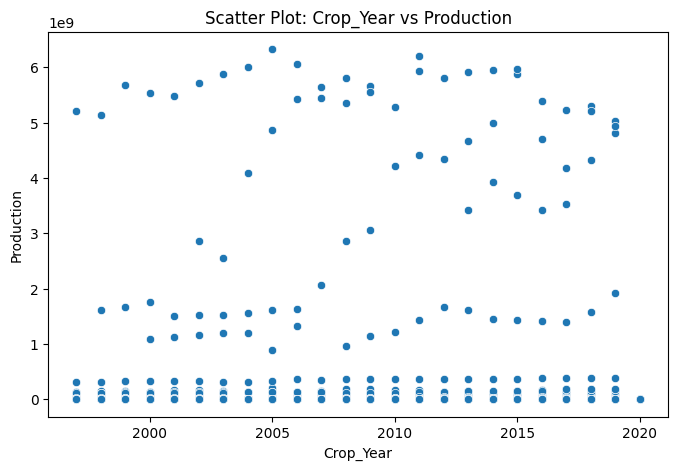

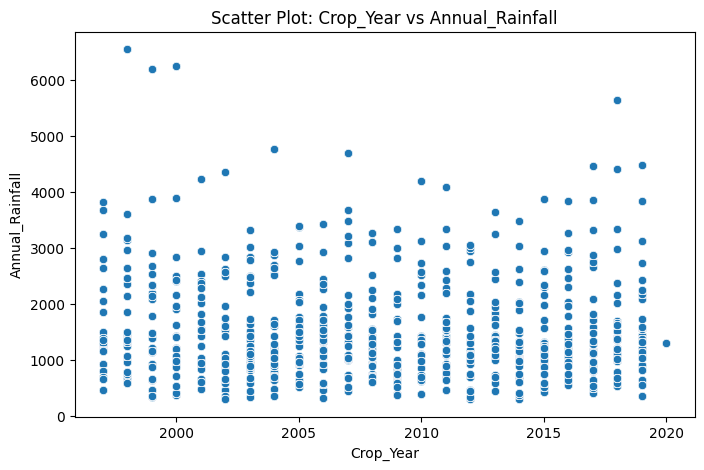

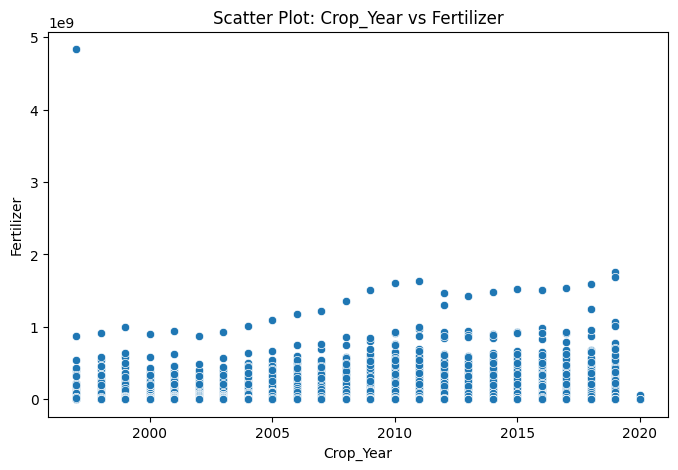

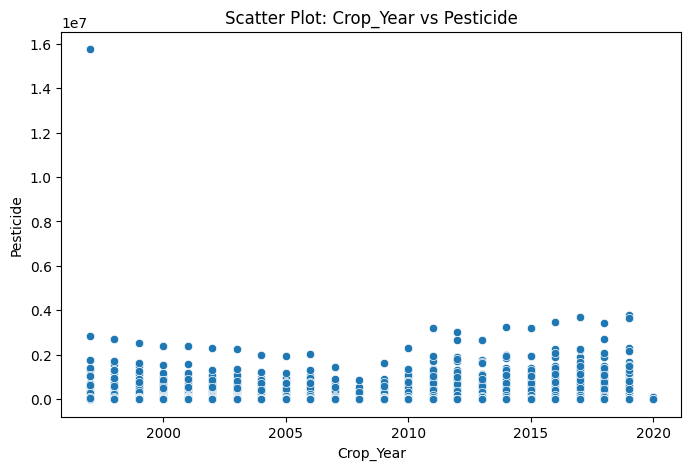

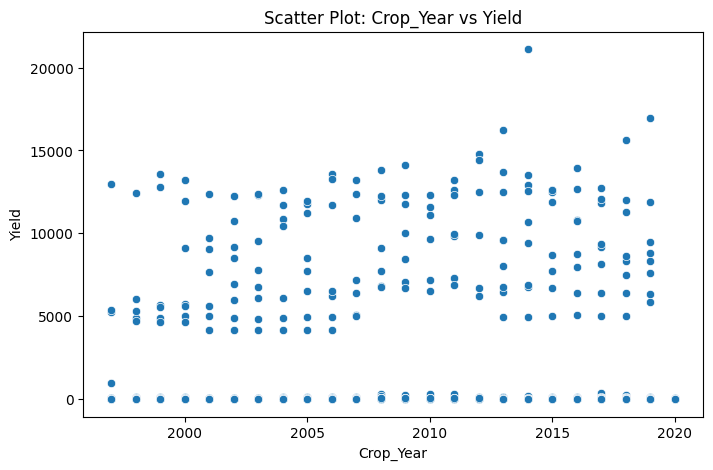

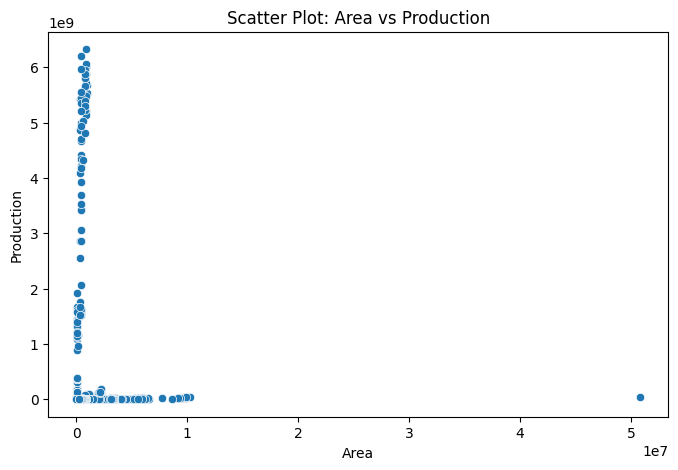

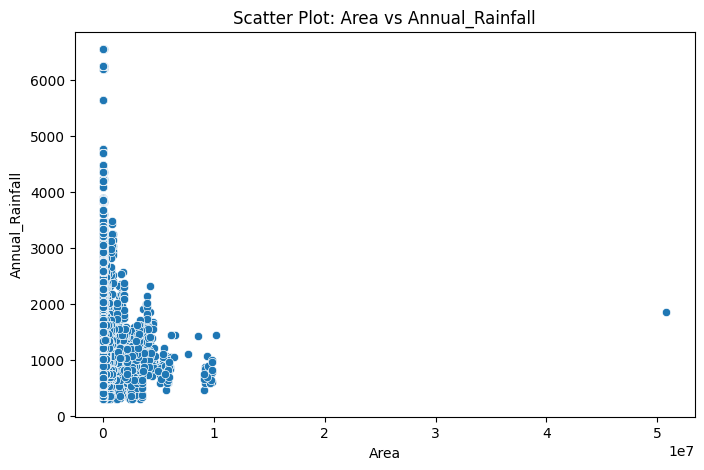

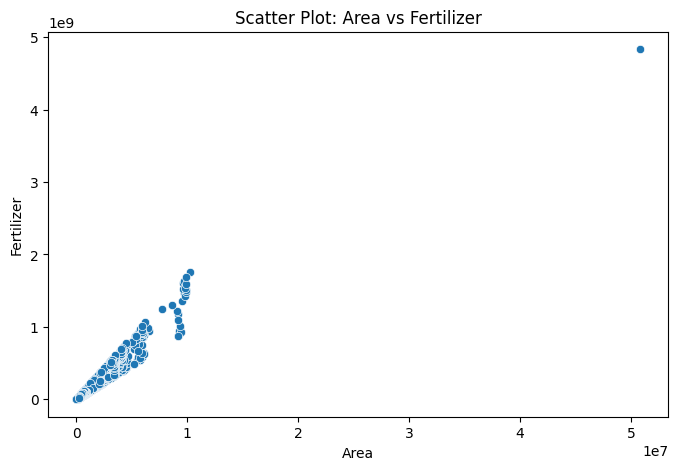

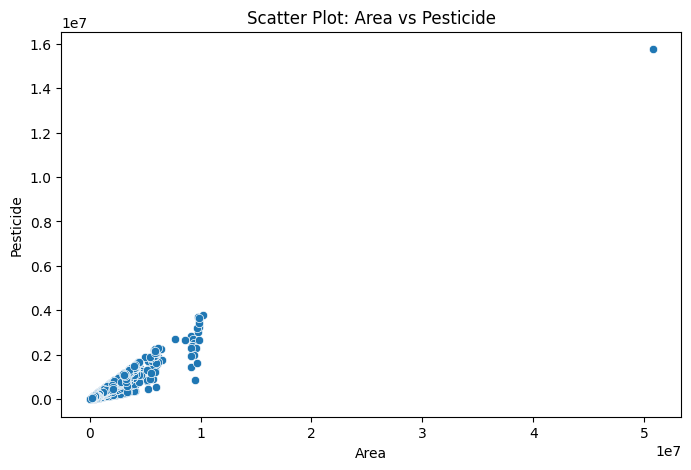

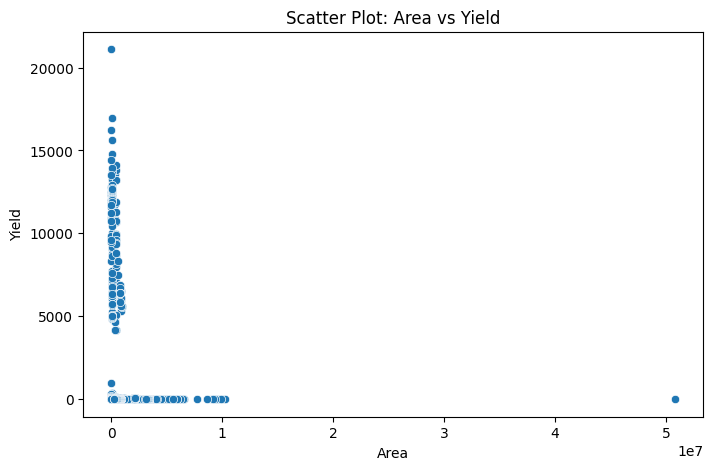

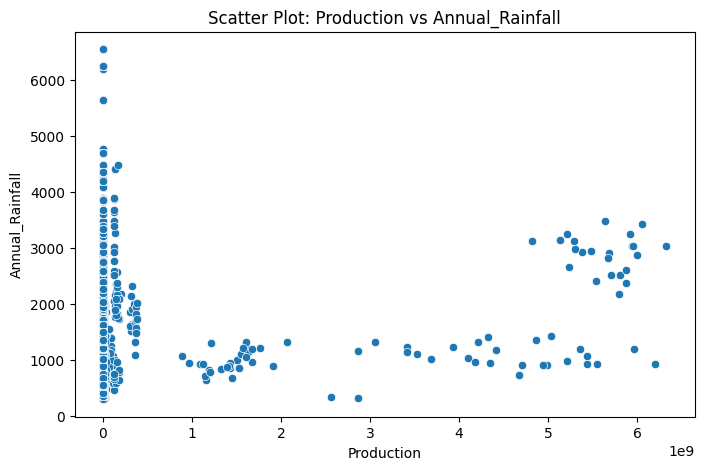

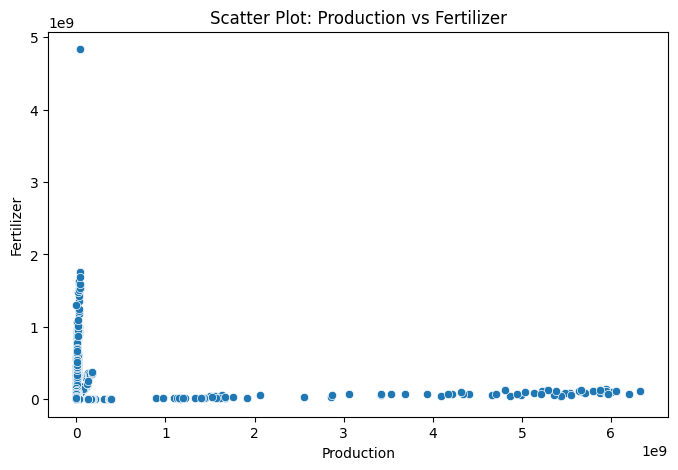

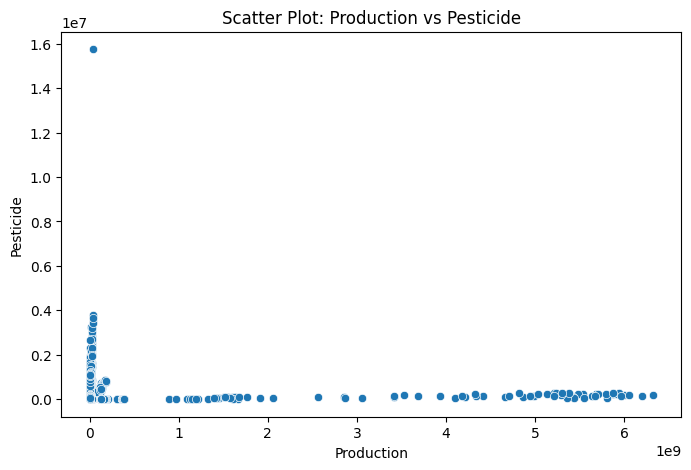

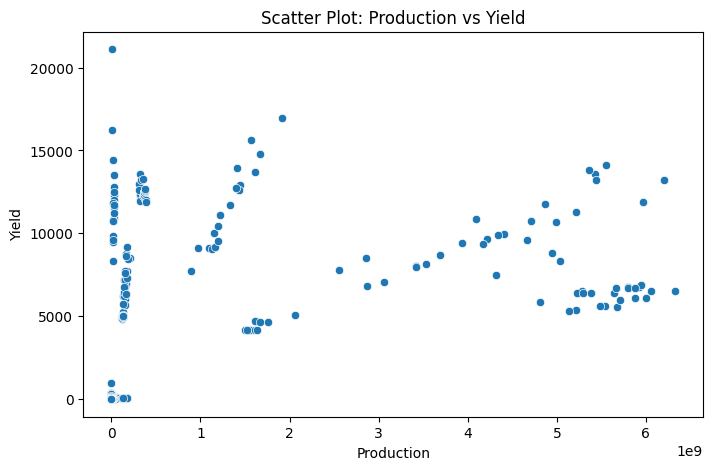

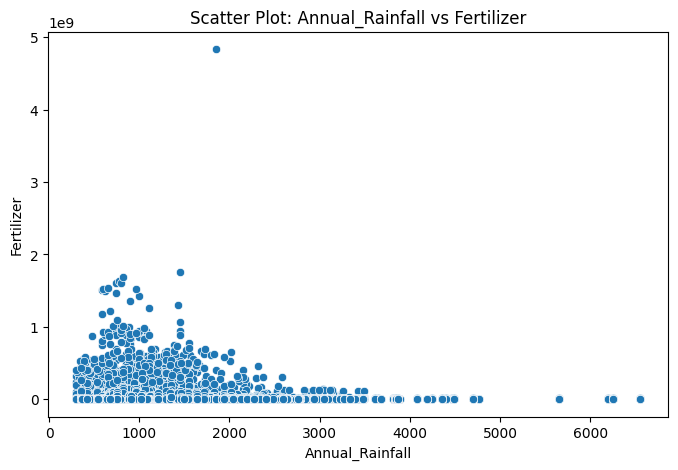

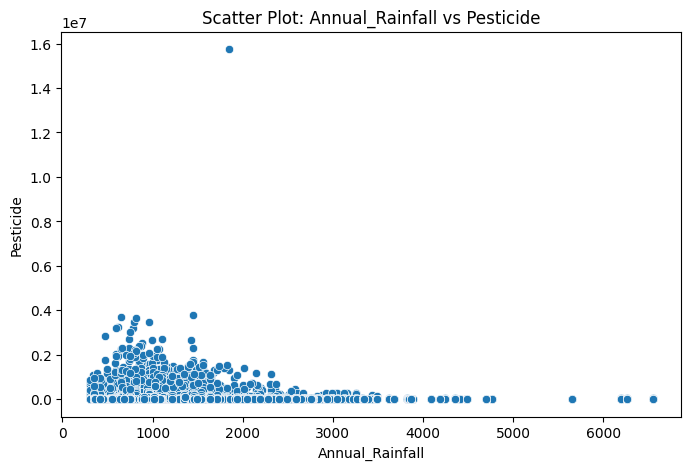

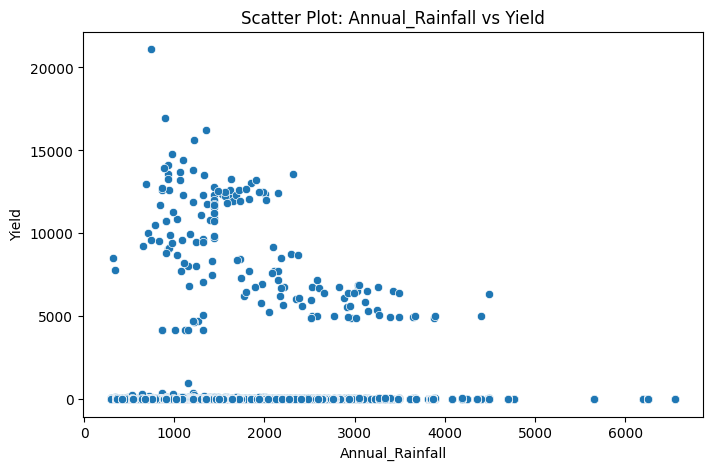

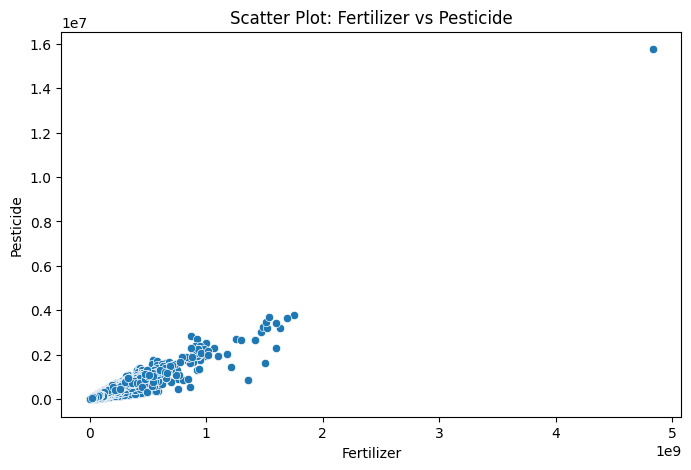

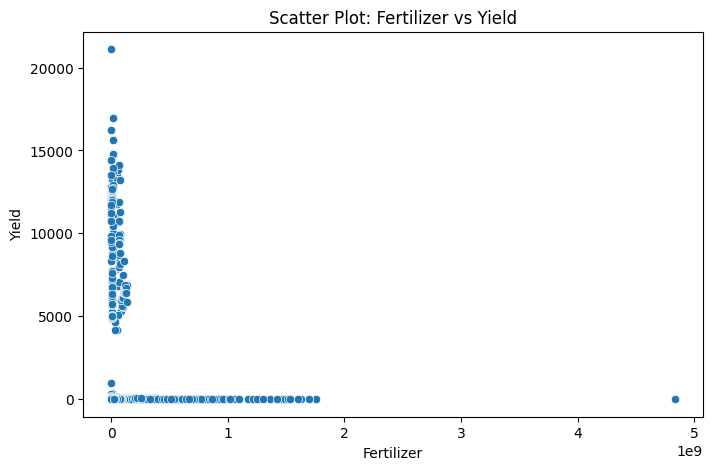

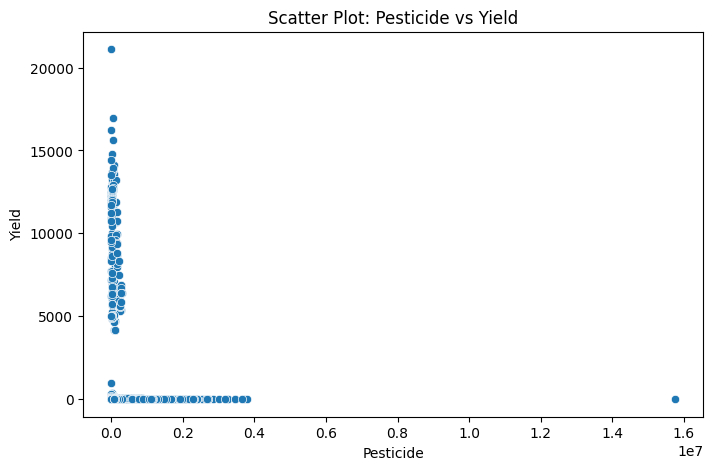

In [16]:
for i in range(len(numerical_cols)):
    for j in range(i+1, len(numerical_cols)):
        plt.figure(figsize=(8, 5))
        sns.scatterplot(data=dataset, x=numerical_cols[i], y=numerical_cols[j])
        plt.title(f'Scatter Plot: {numerical_cols[i]} vs {numerical_cols[j]}')
        plt.xlabel(numerical_cols[i])
        plt.ylabel(numerical_cols[j])
        plt.show()

Categorical - Numerical

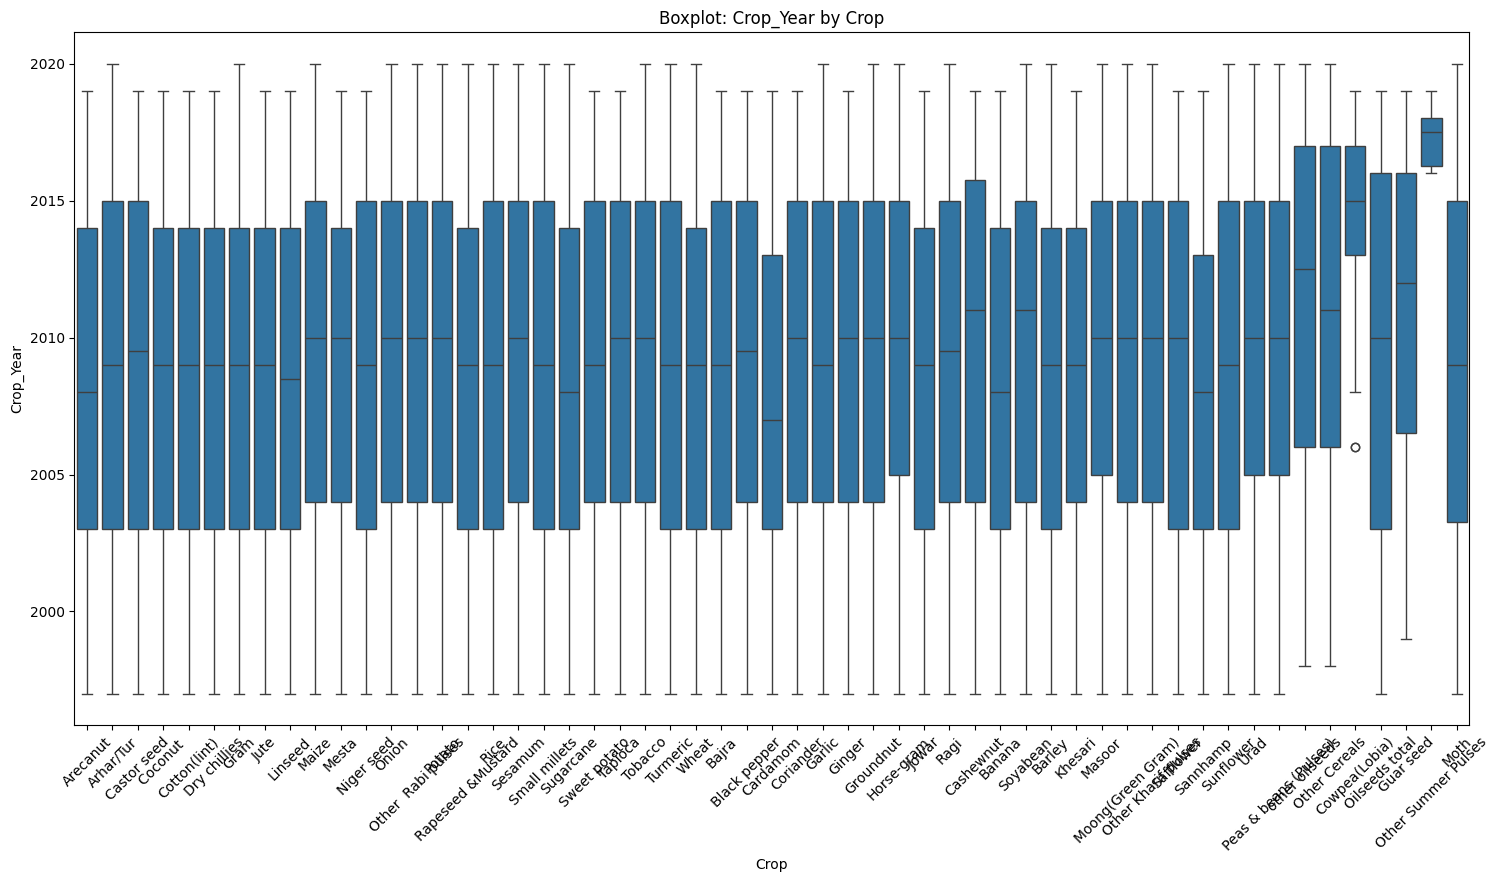

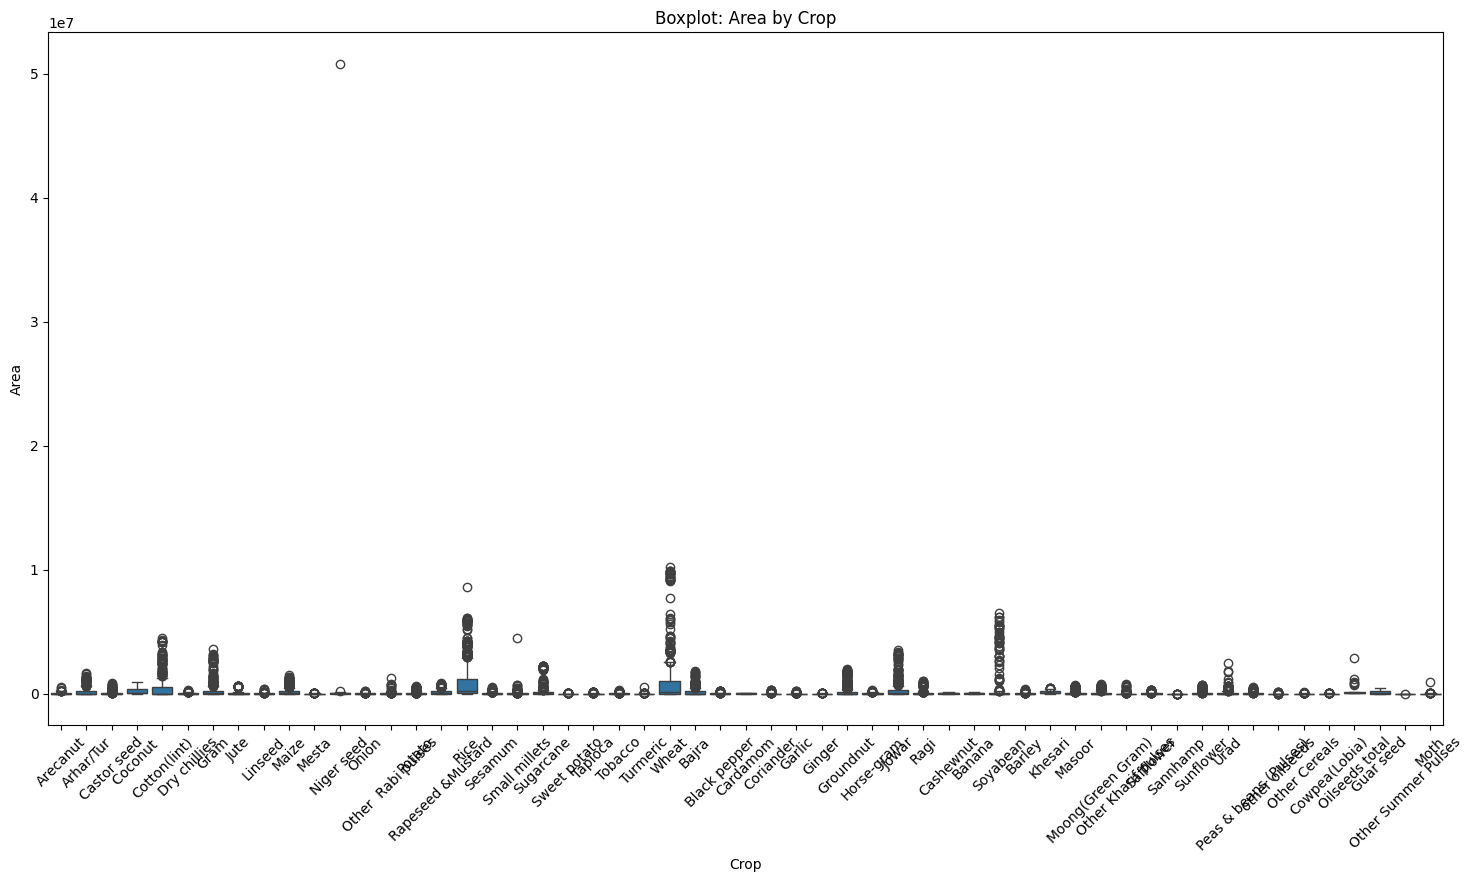

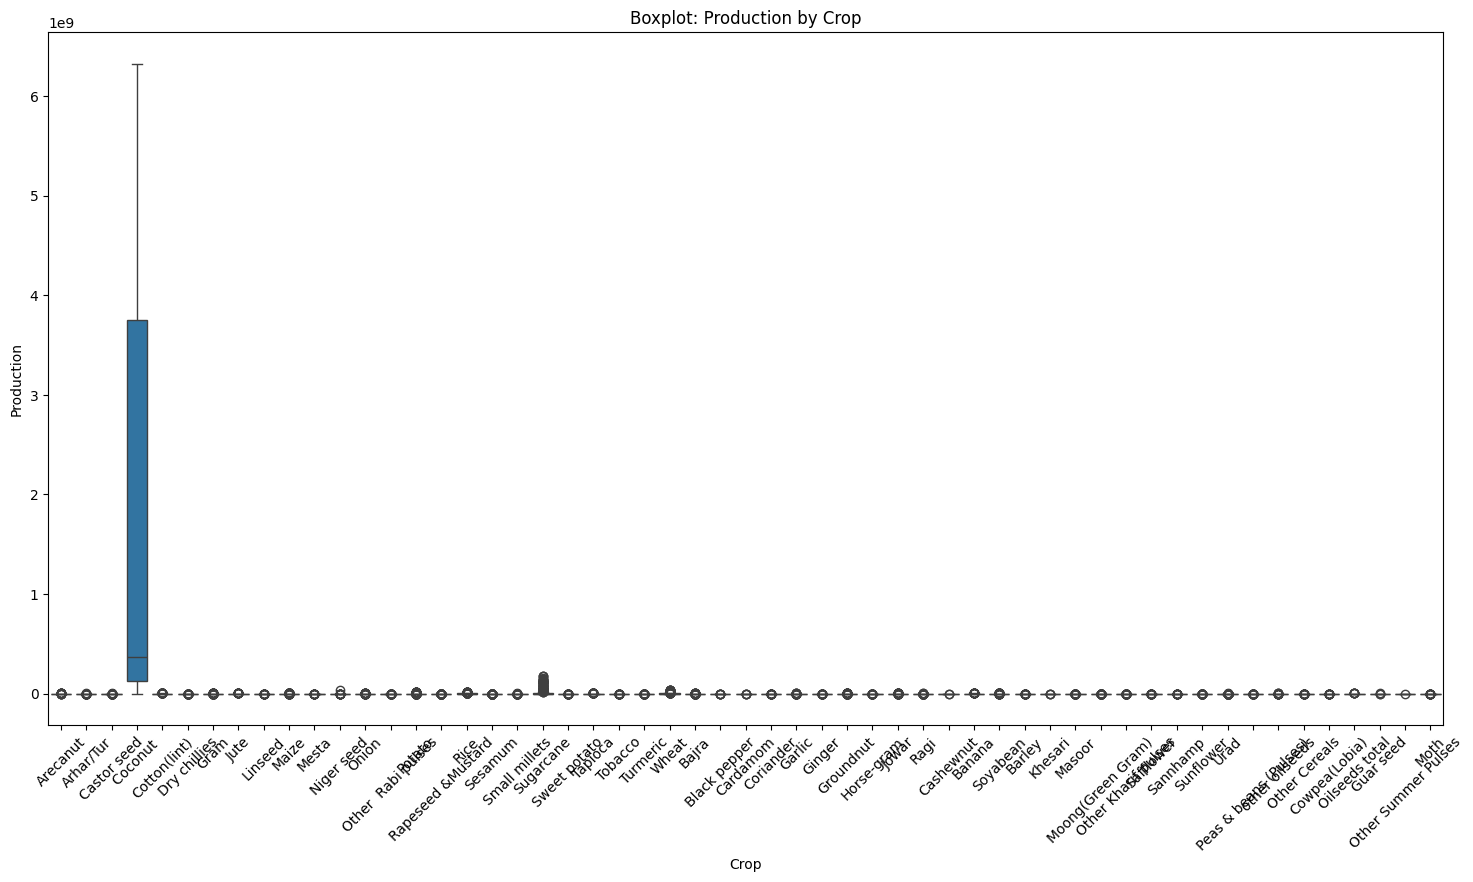

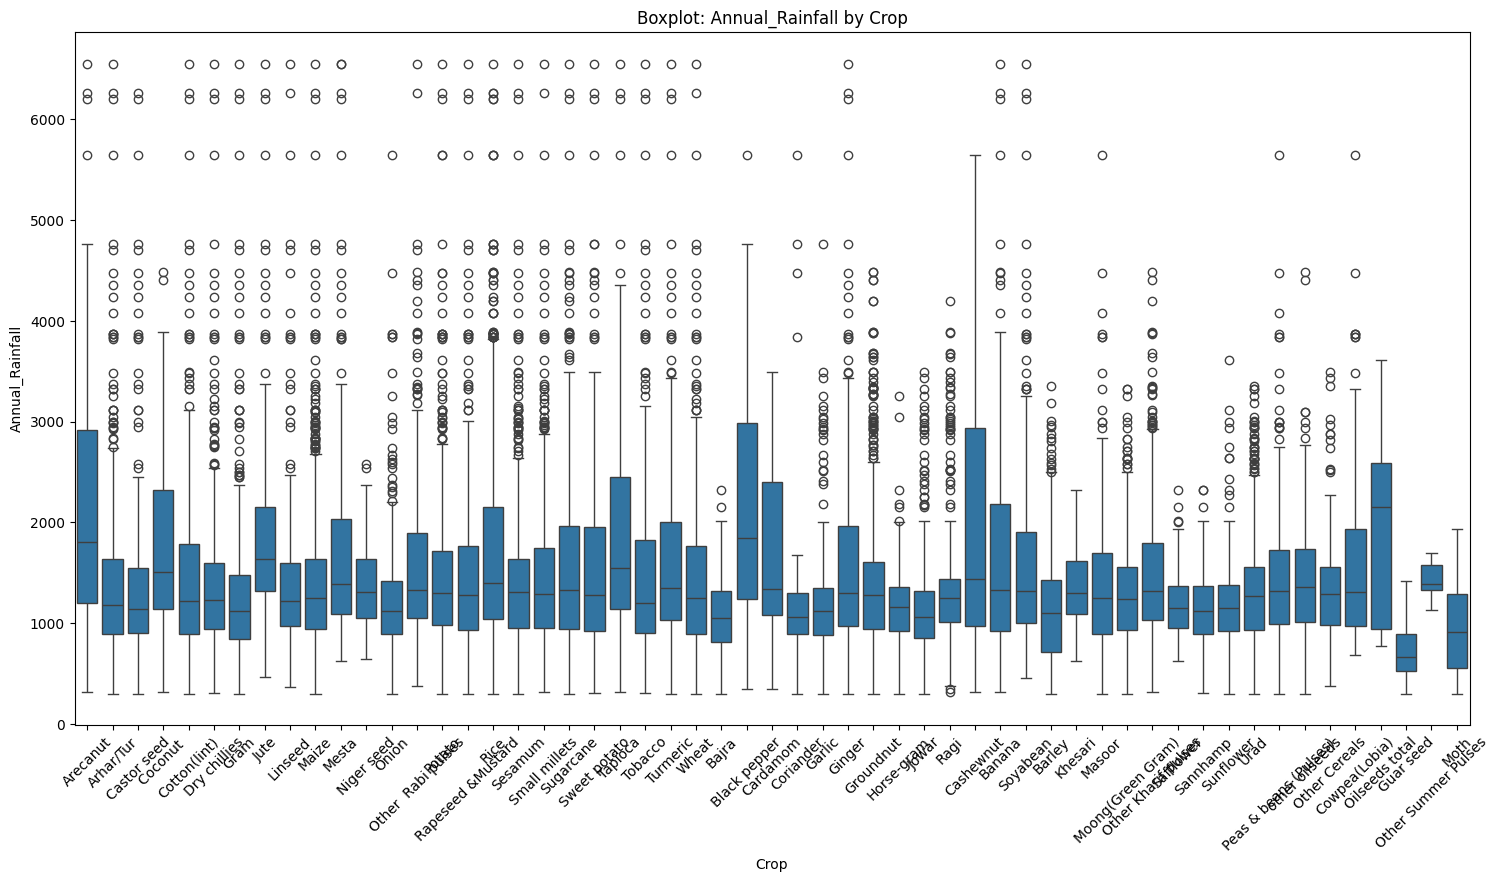

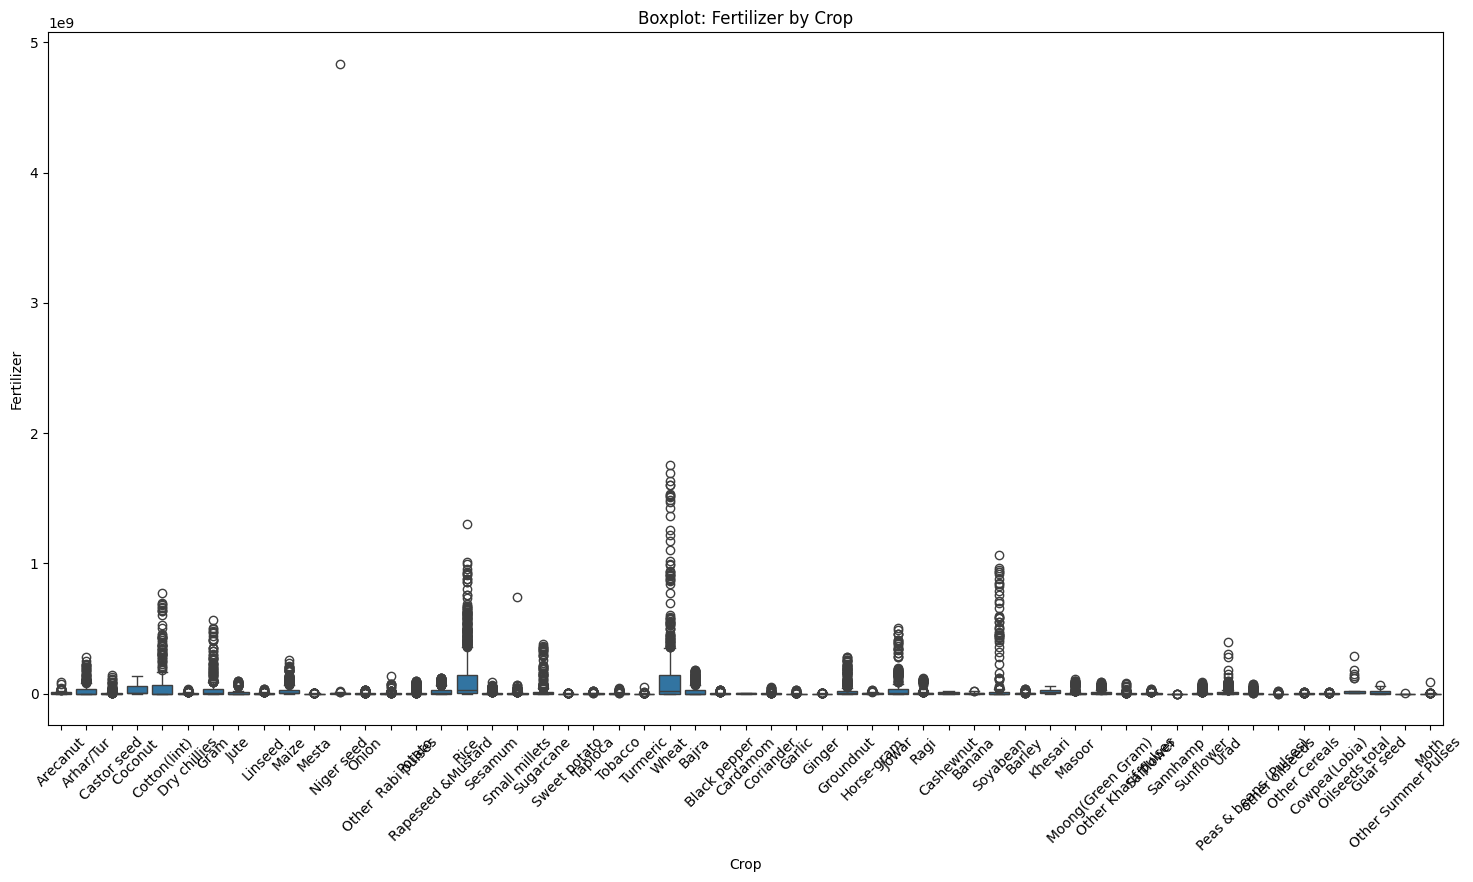

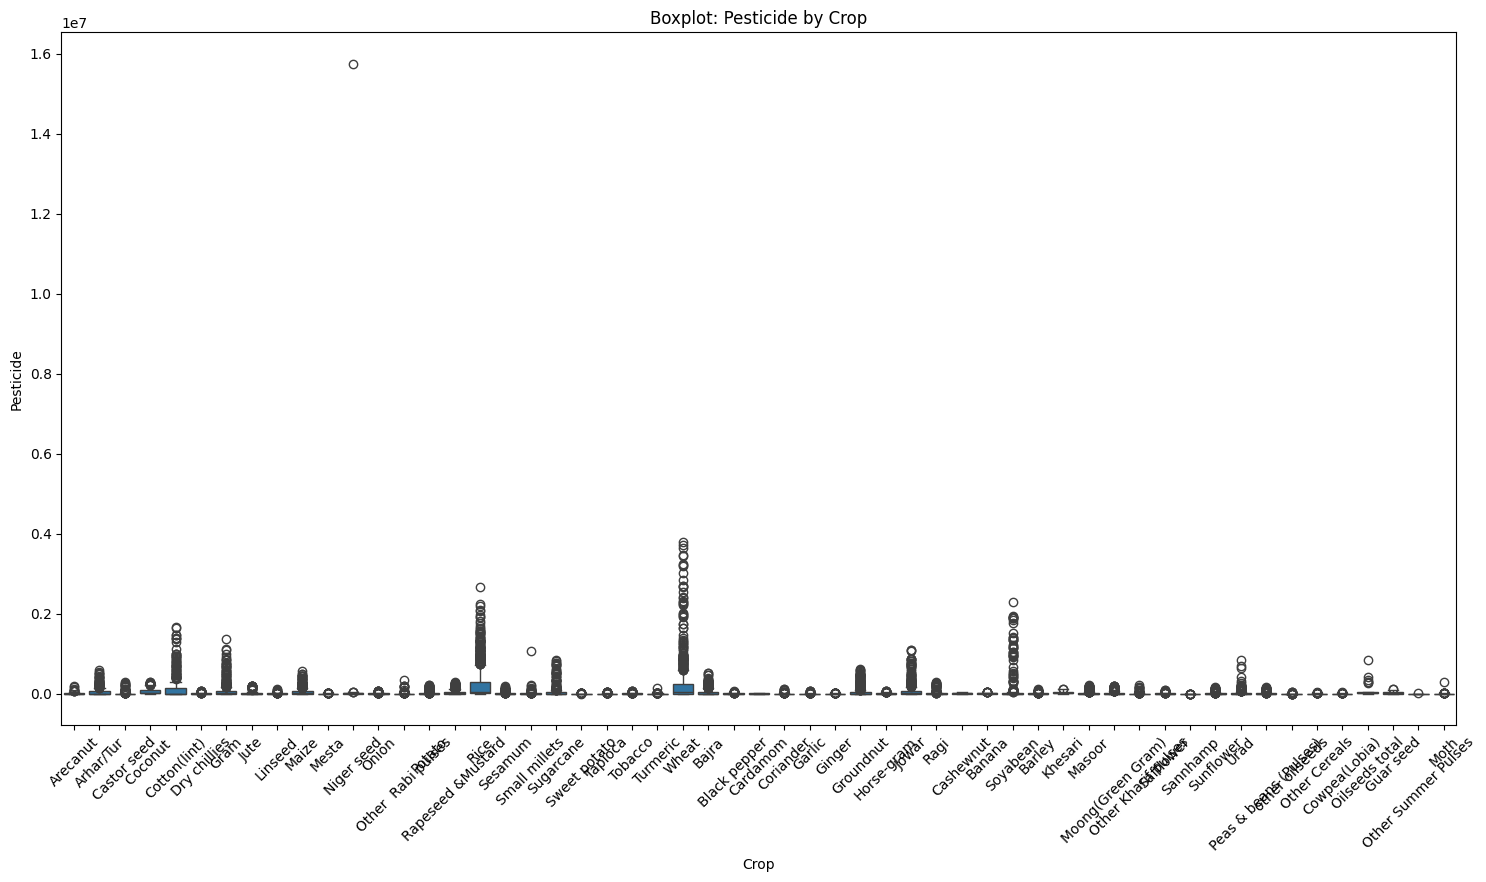

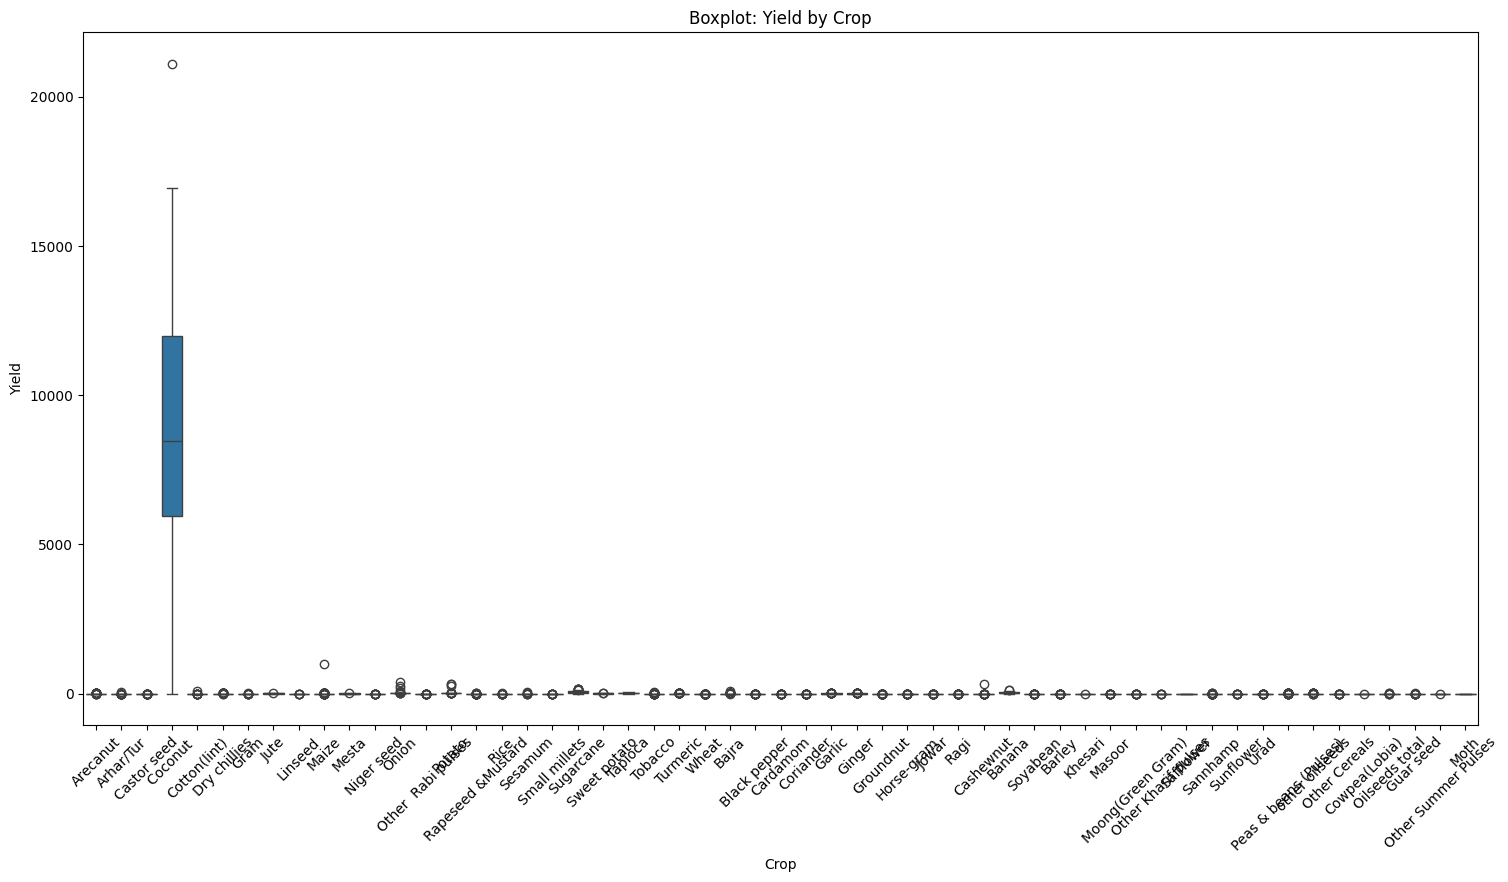

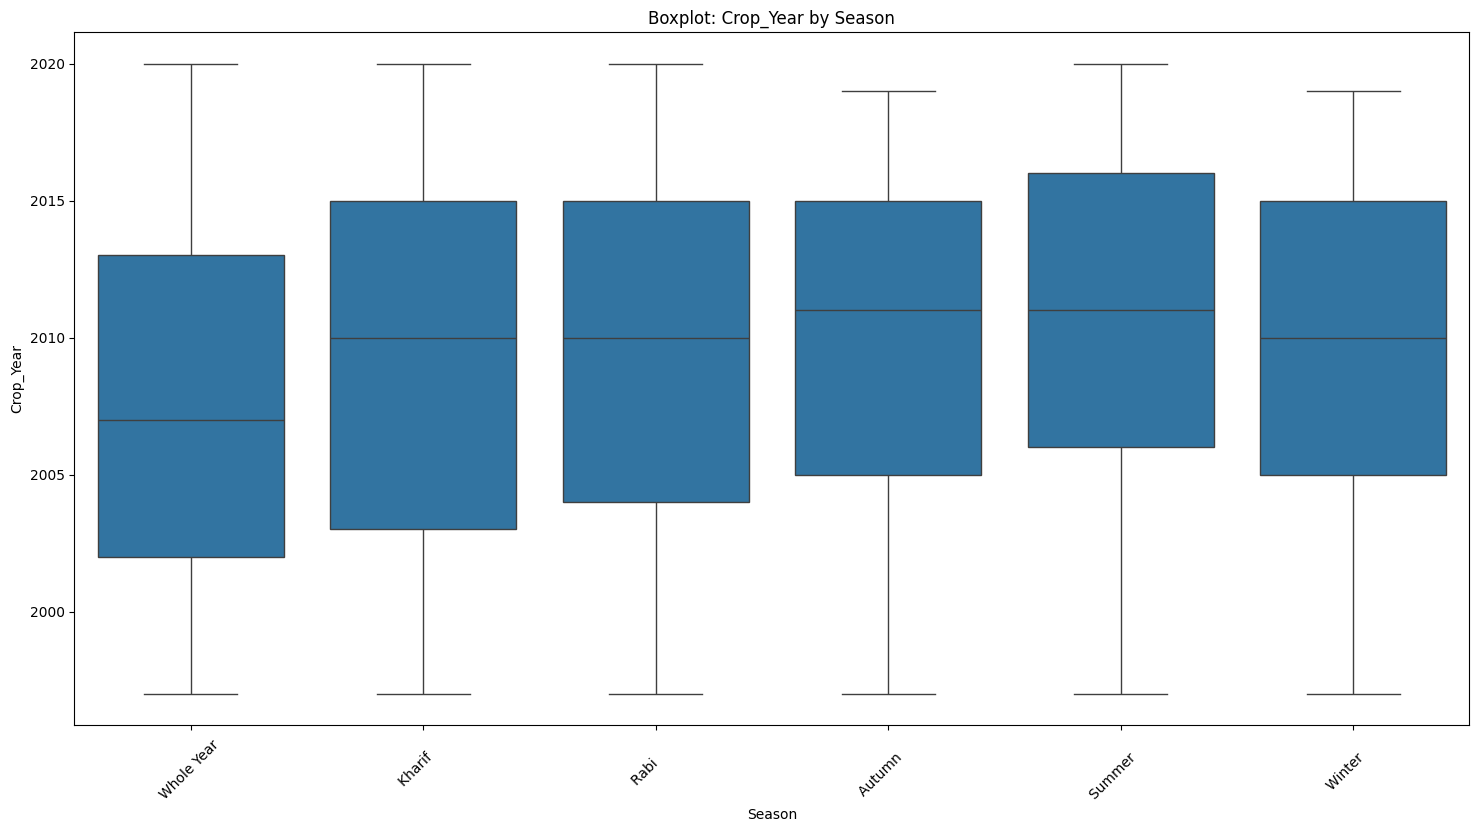

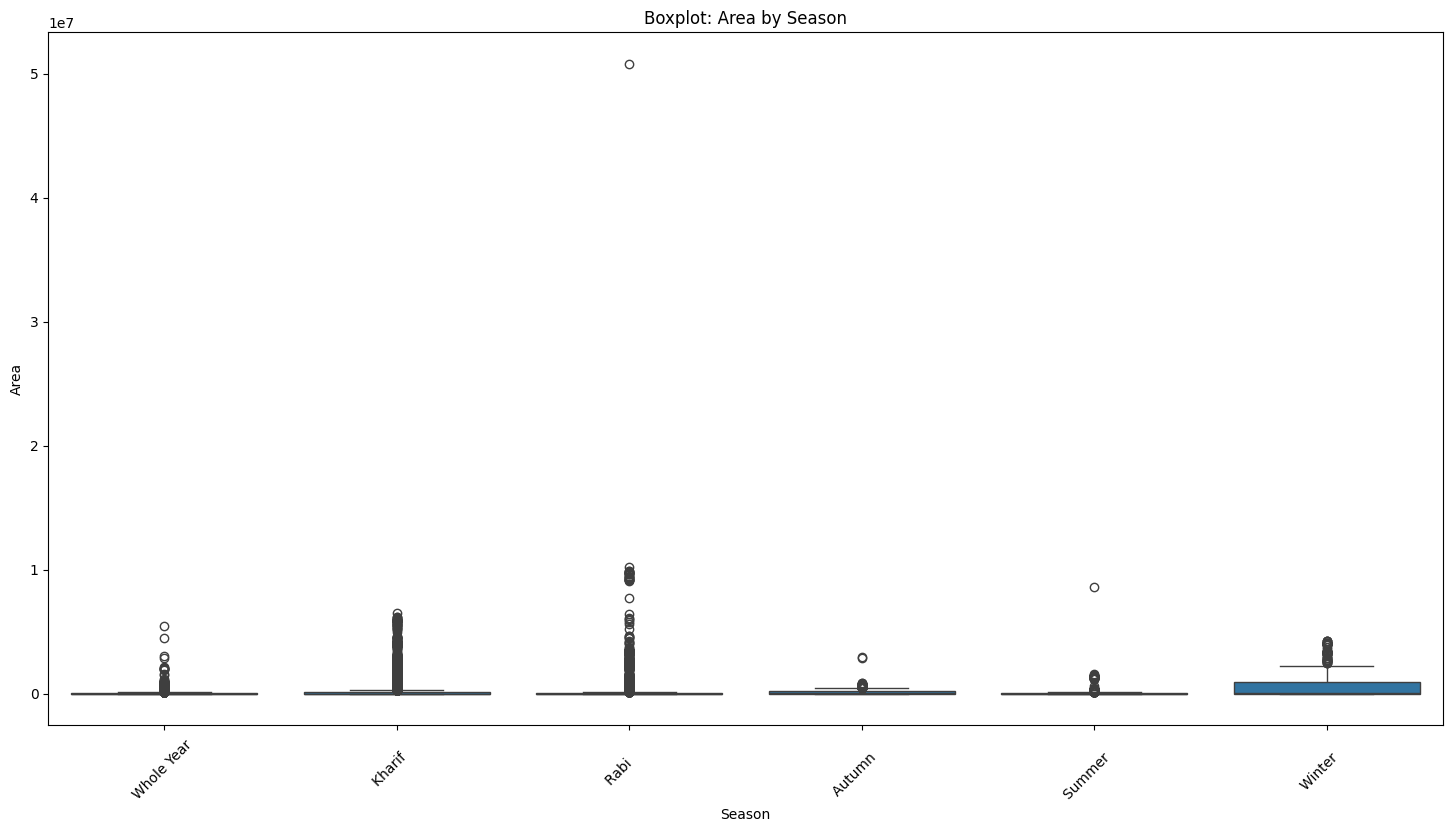

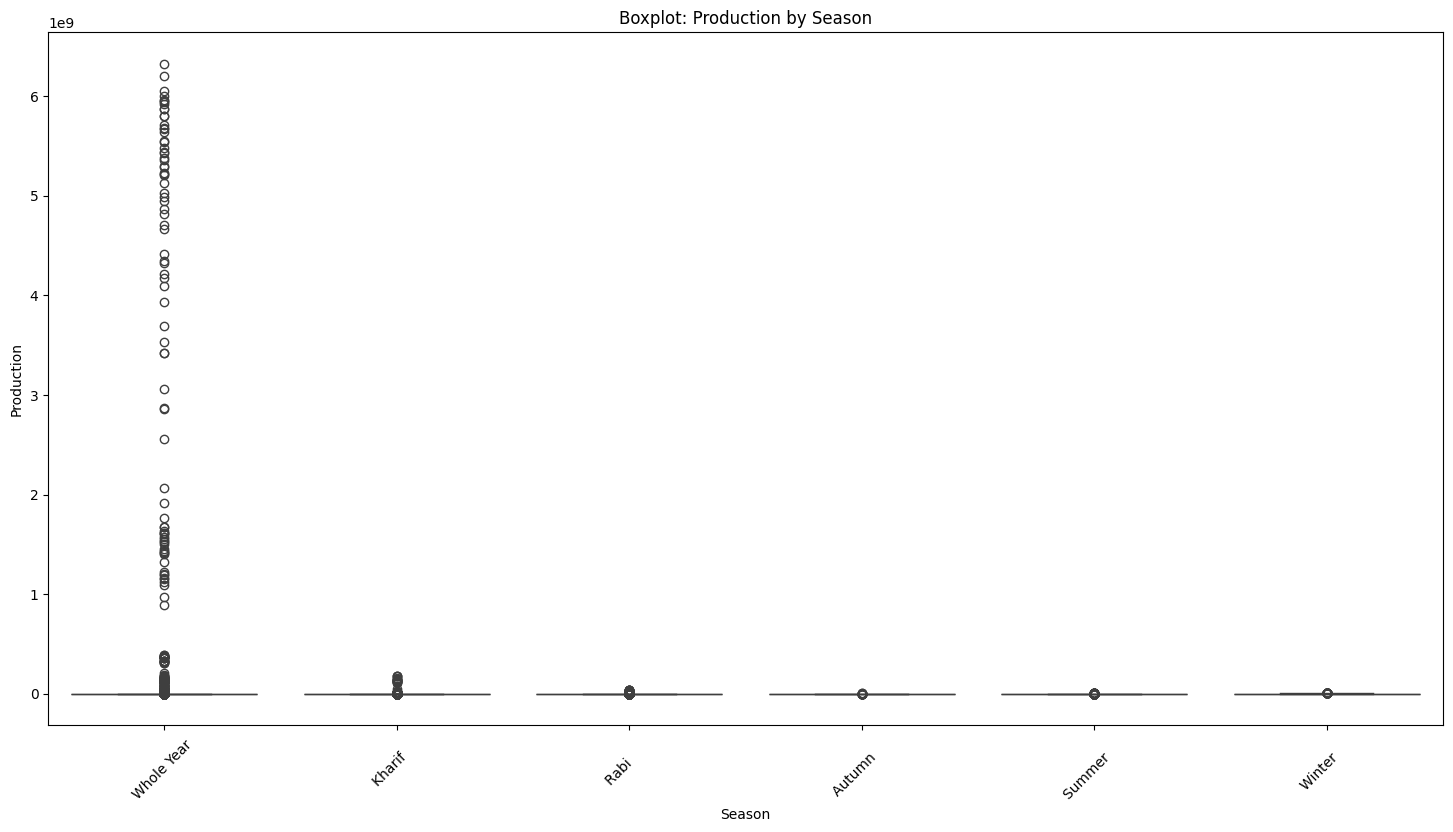

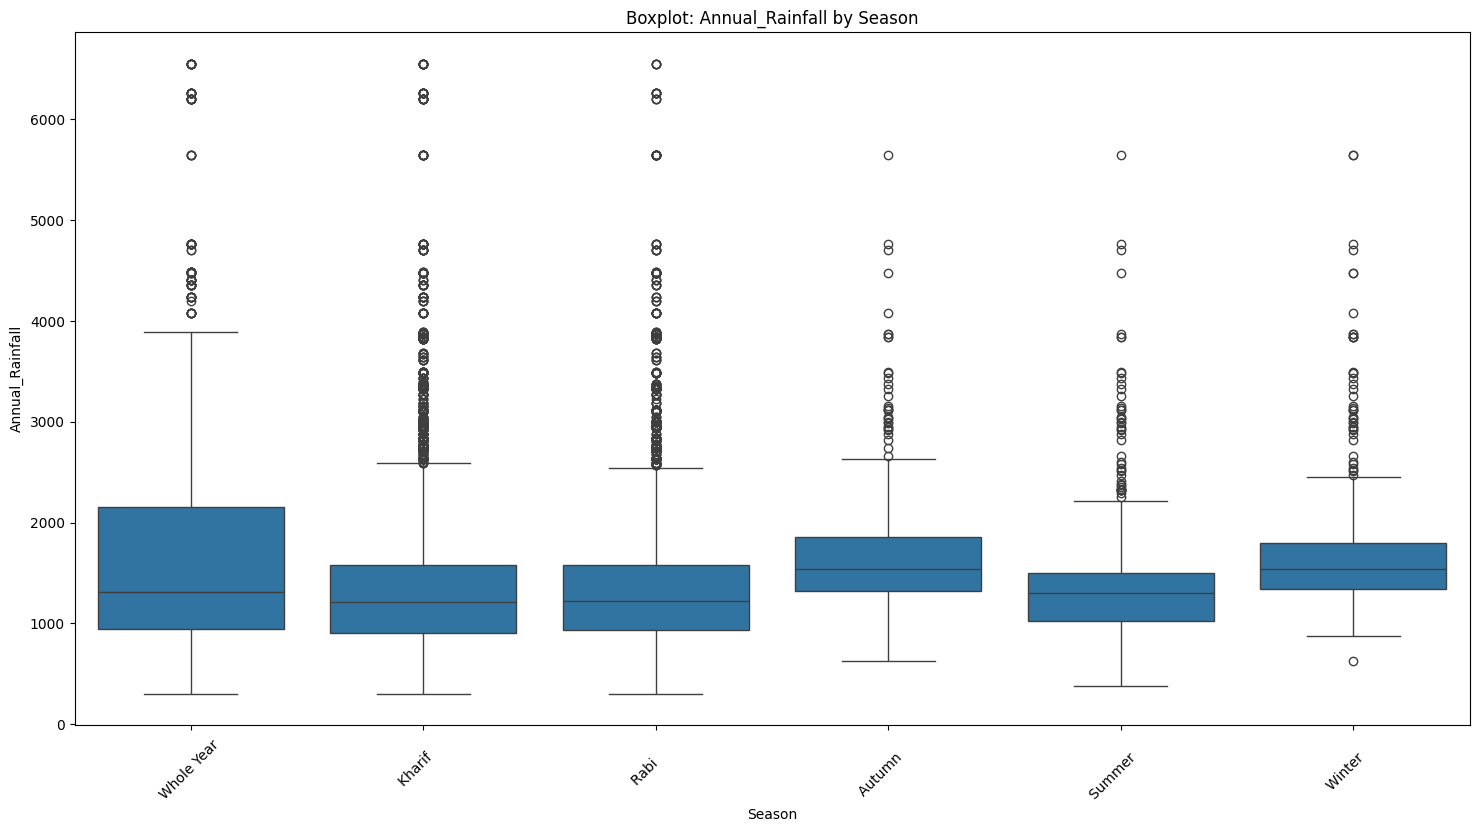

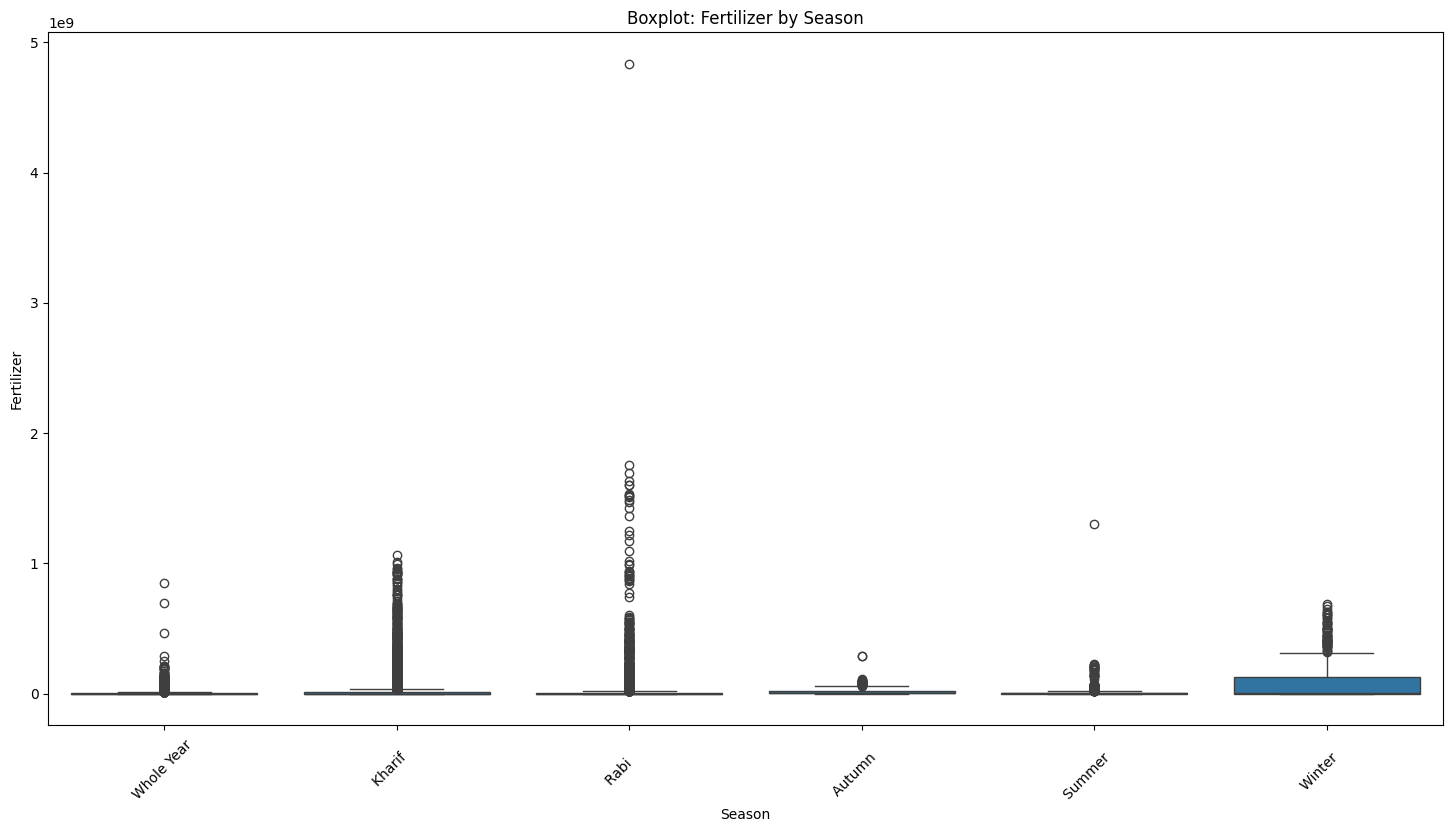

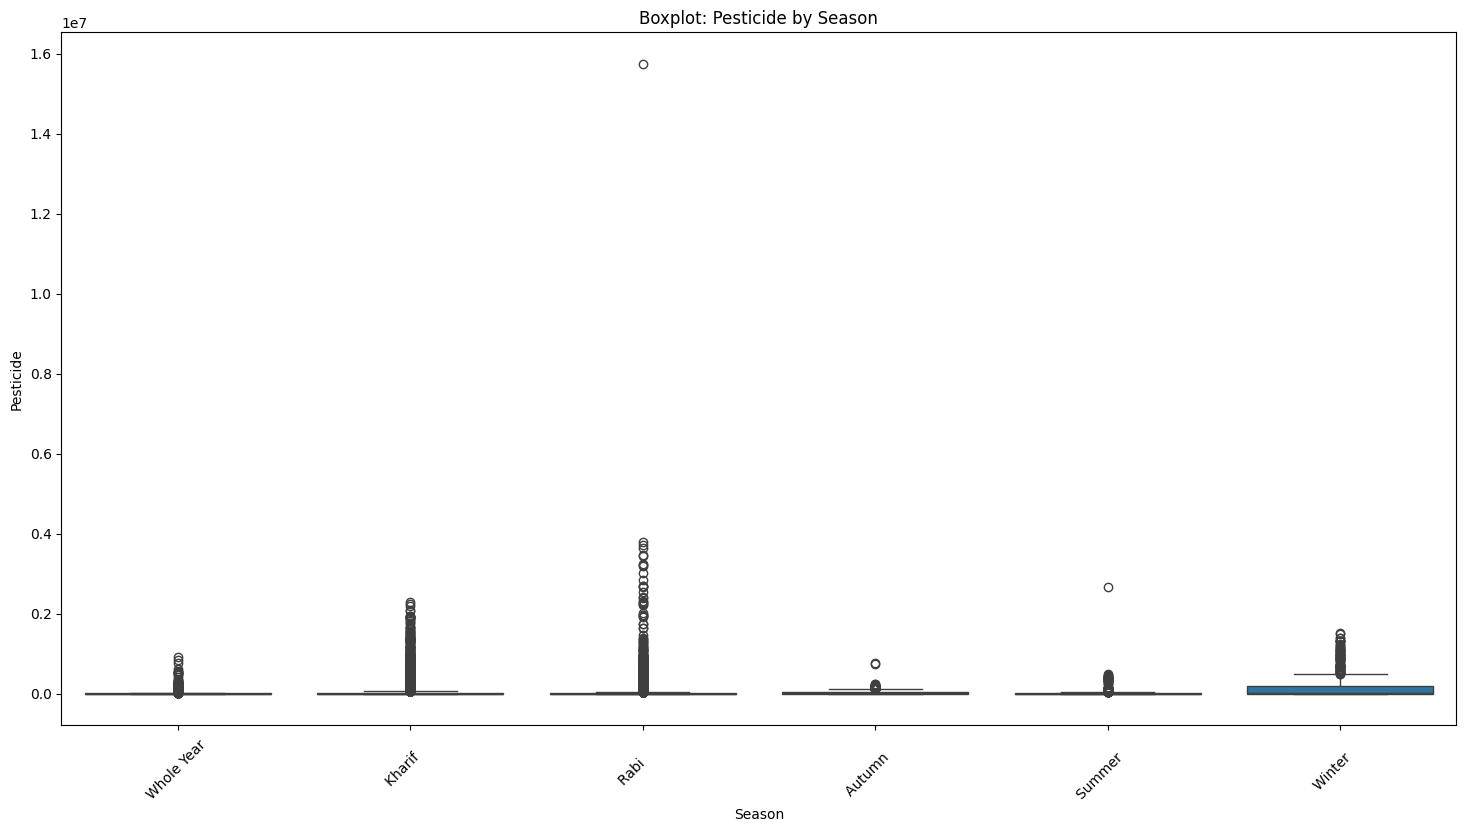

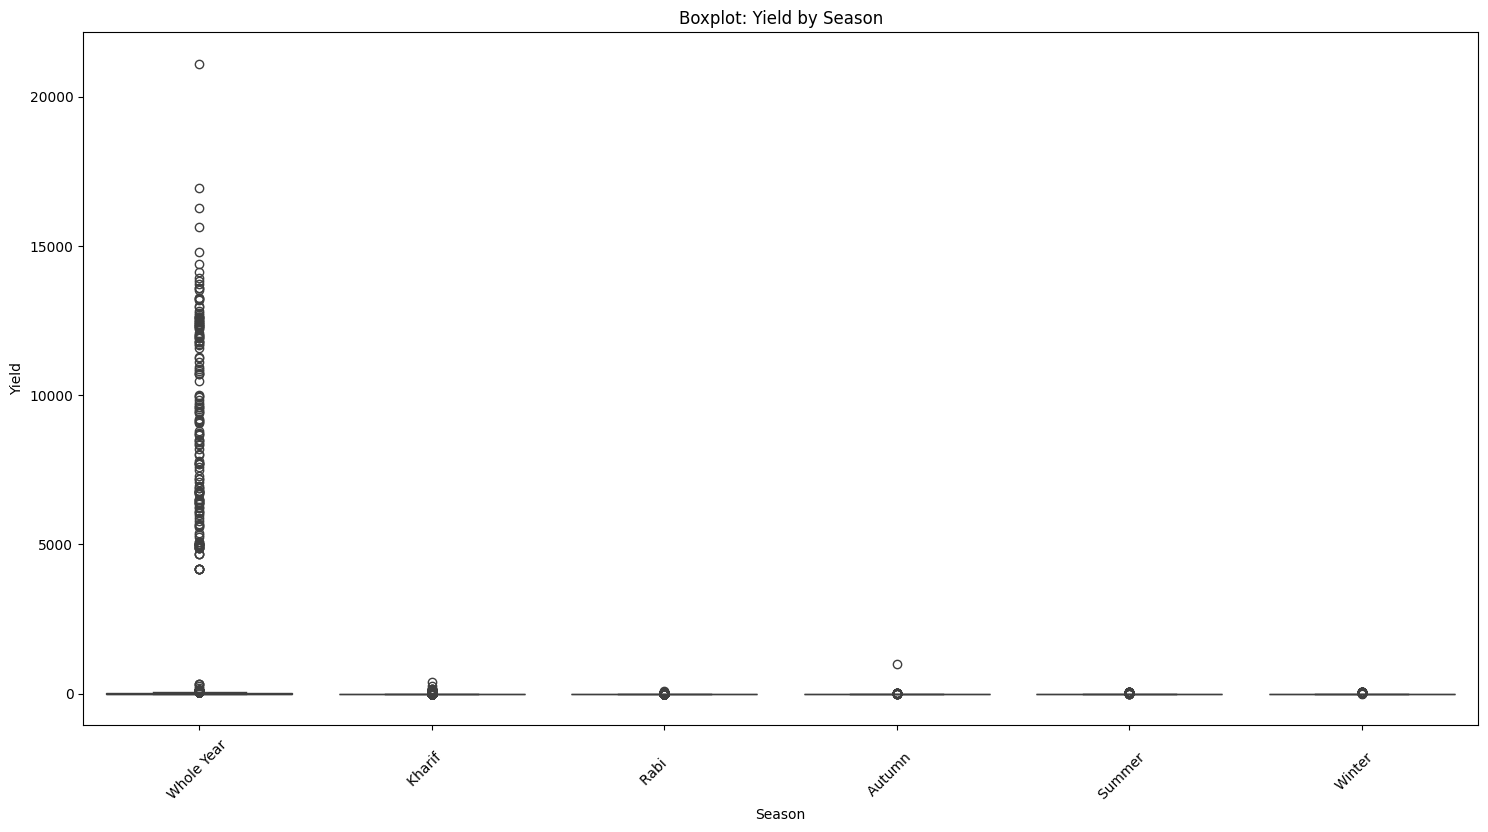

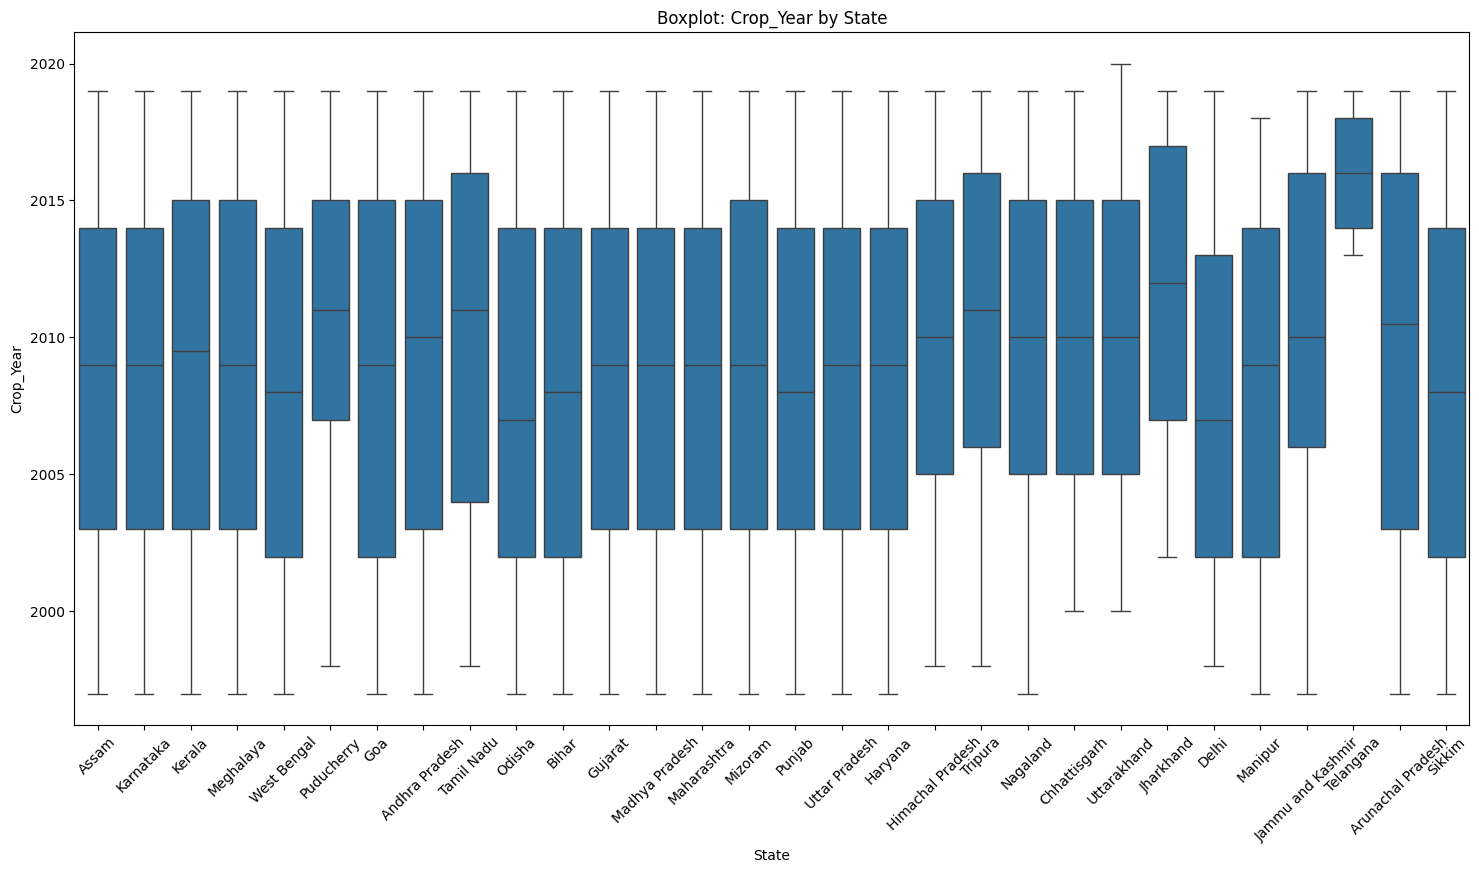

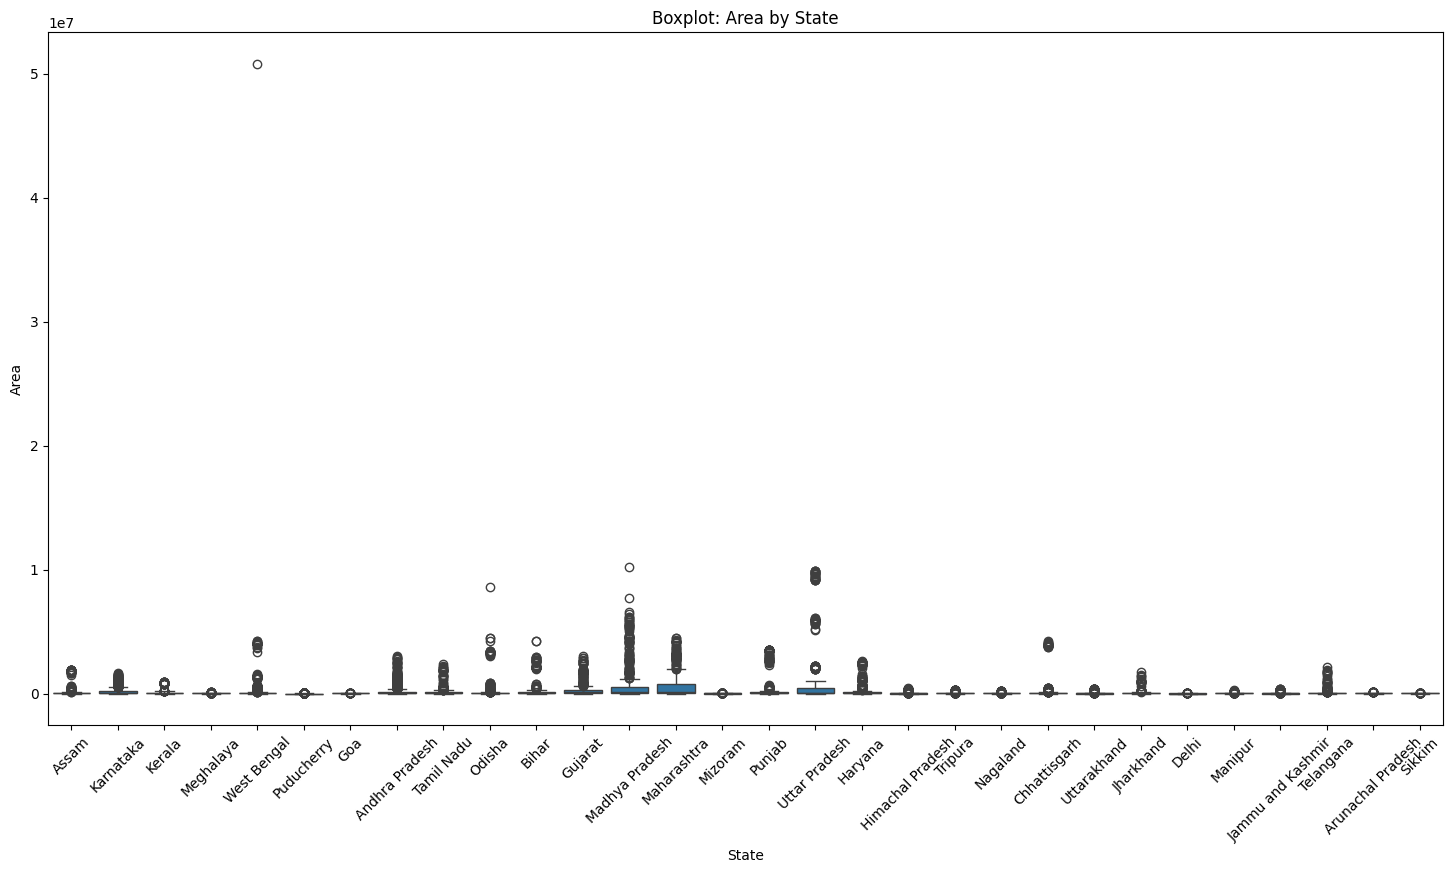

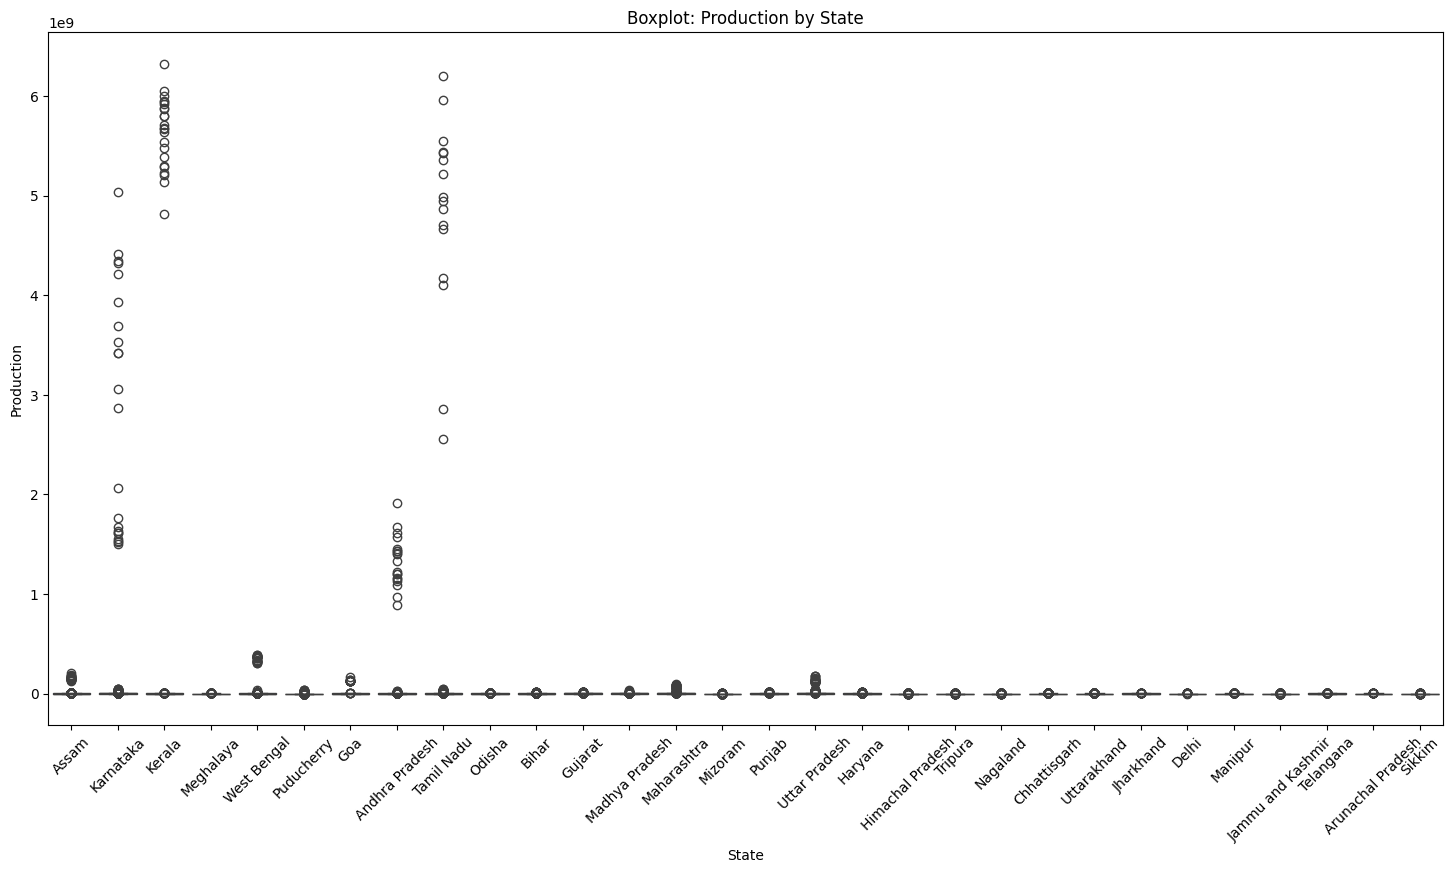

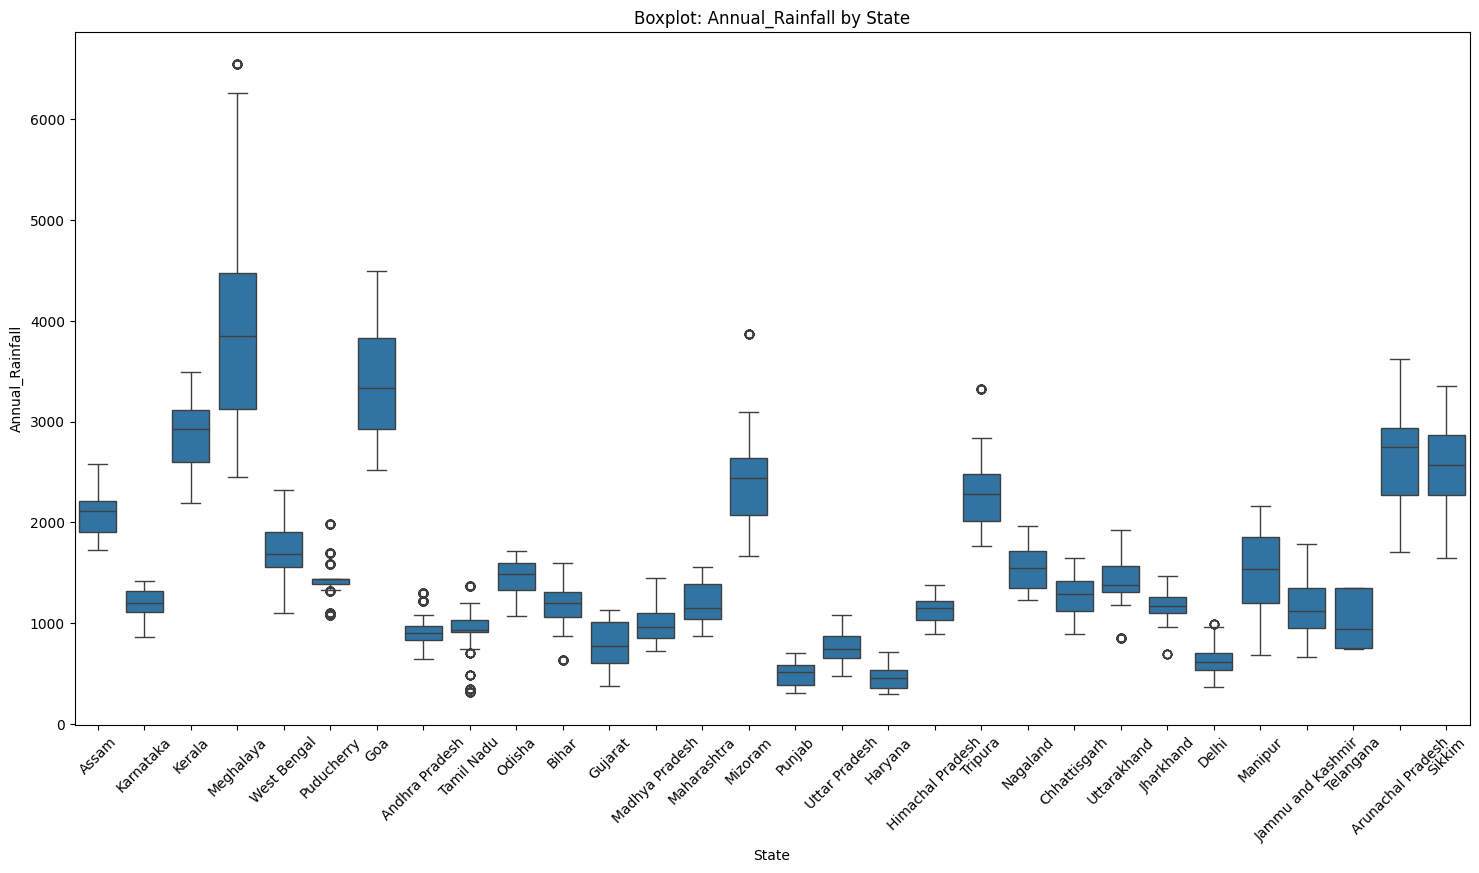

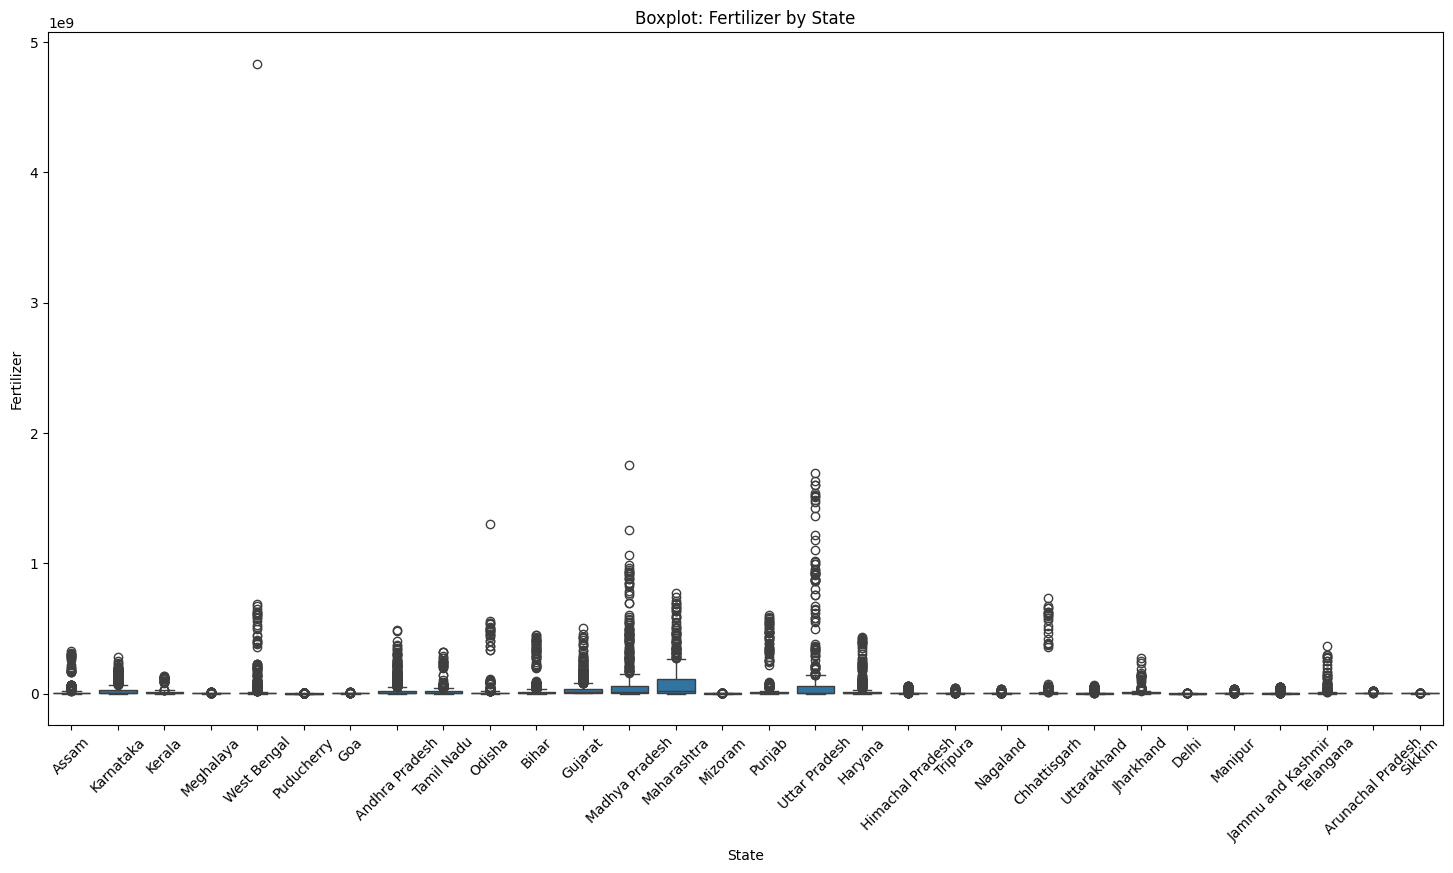

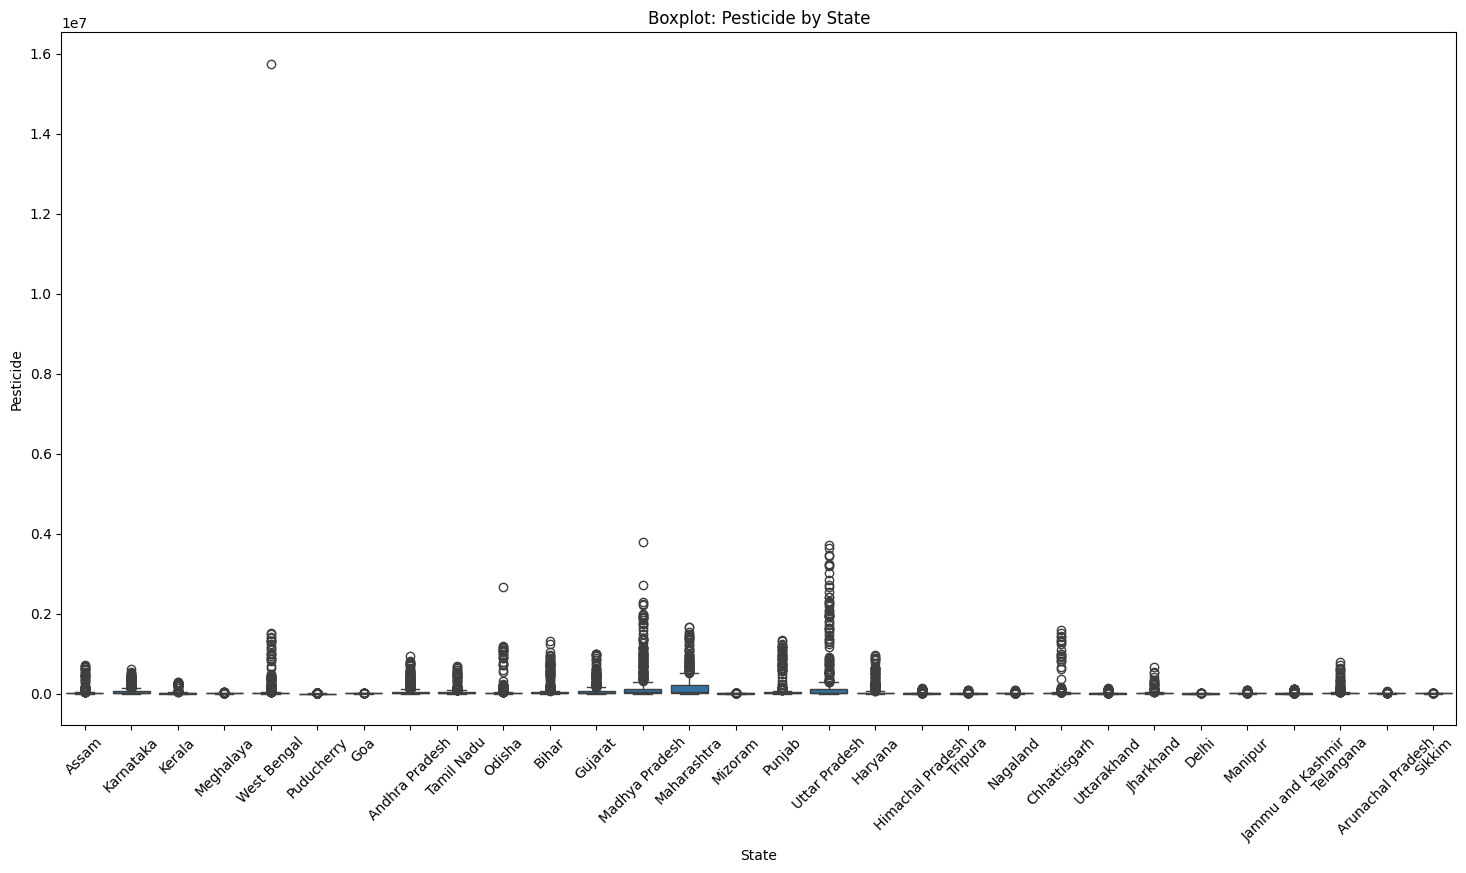

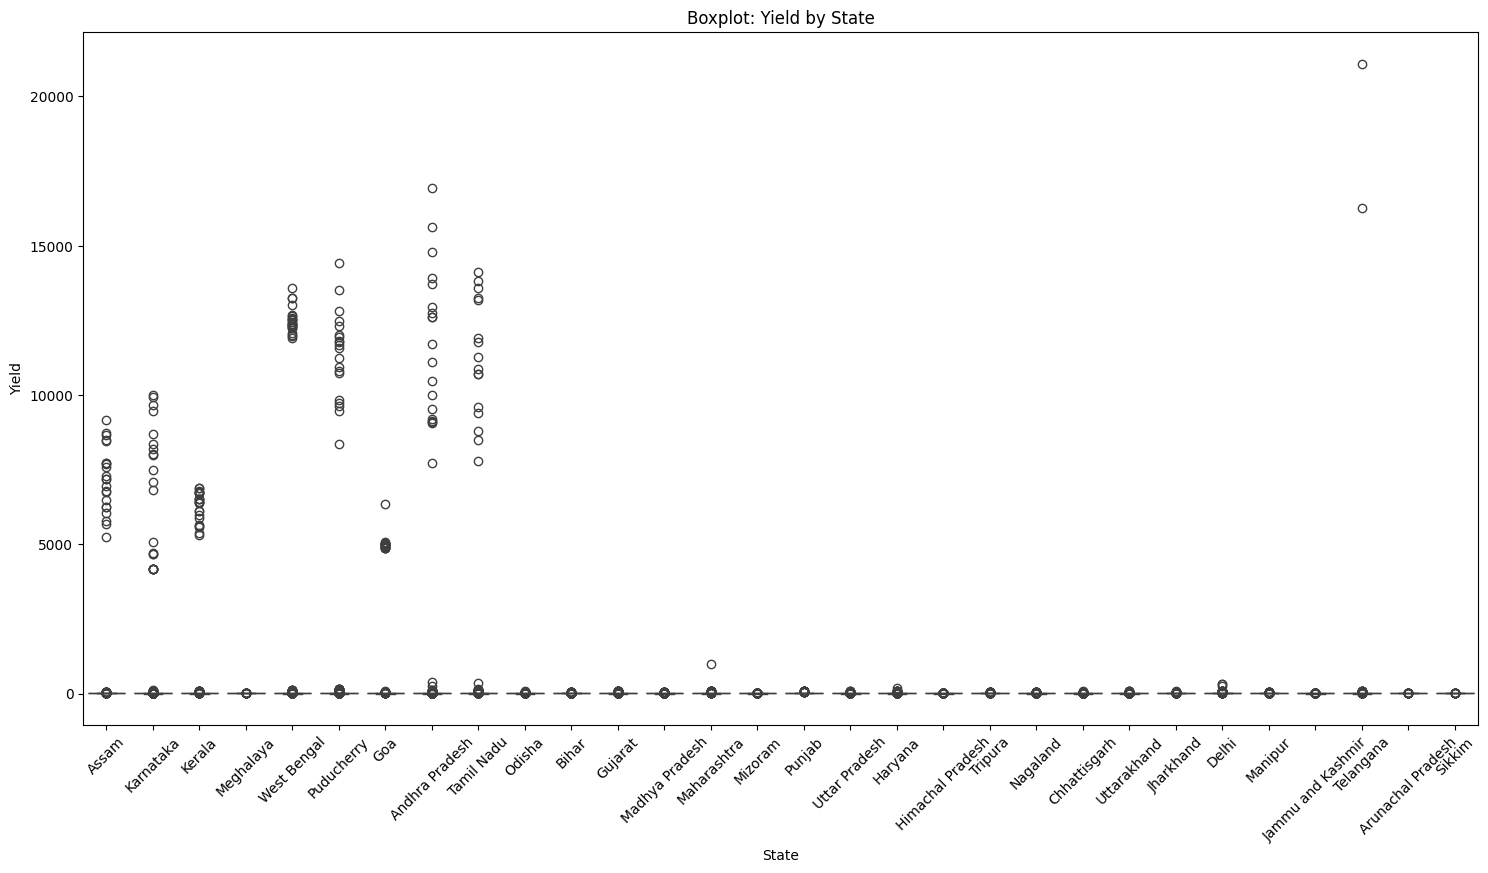

In [17]:
for cat_col in categorical_cols:
    for num_col in numerical_cols:
        plt.figure(figsize=(18, 9))
        sns.boxplot(data=dataset, x=cat_col, y=num_col)
        plt.xticks(rotation=45)
        plt.title(f'Boxplot: {num_col} by {cat_col}')
        plt.xlabel(cat_col)
        plt.ylabel(num_col)
        plt.show()

Categorical - Categorical

<Figure size 900x400 with 0 Axes>

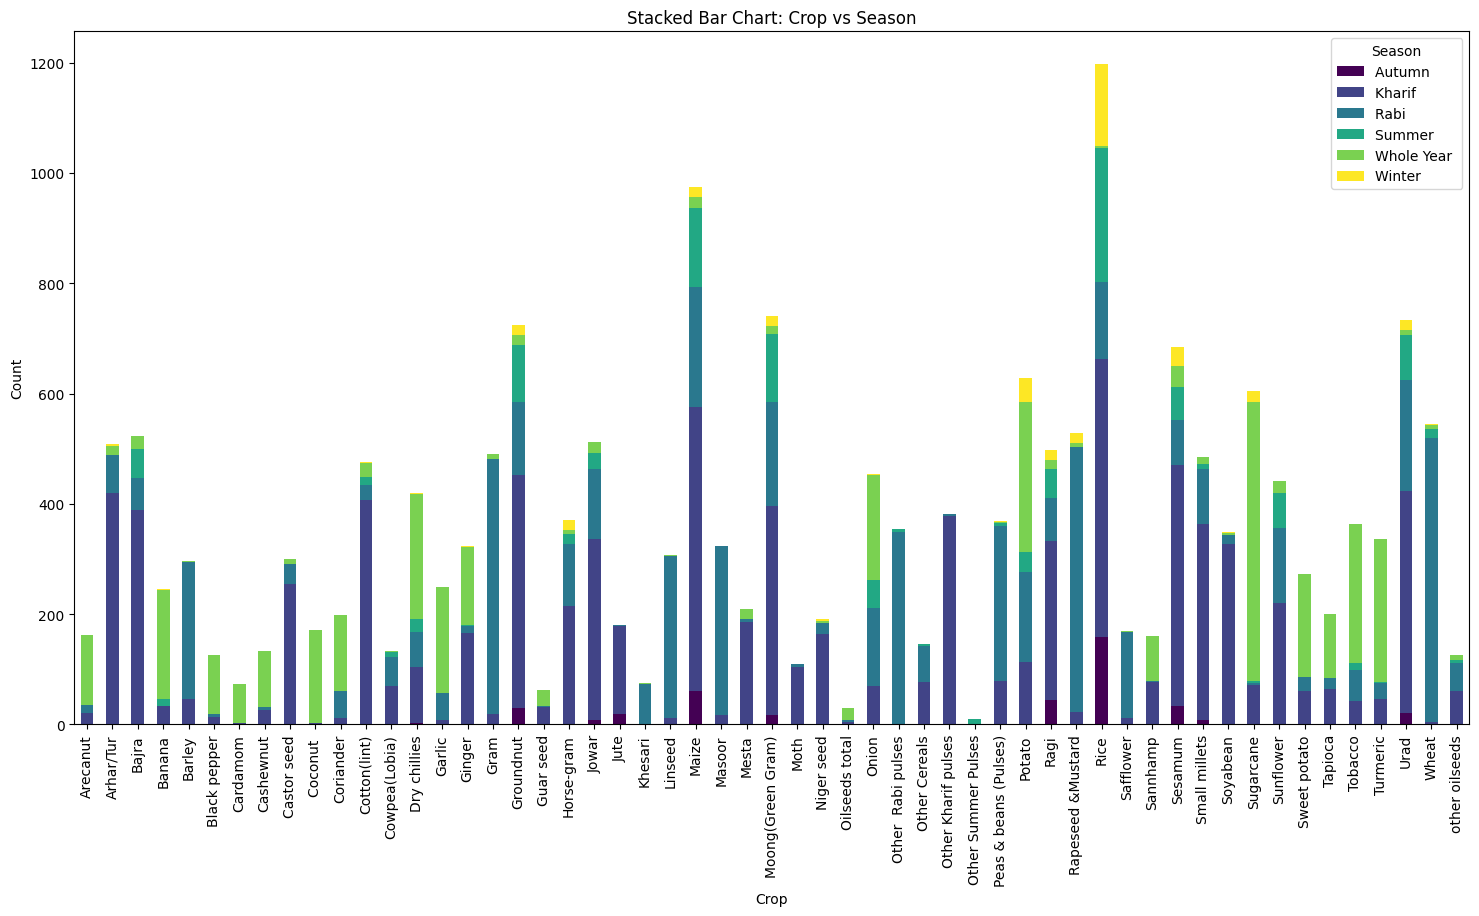

<Figure size 900x400 with 0 Axes>

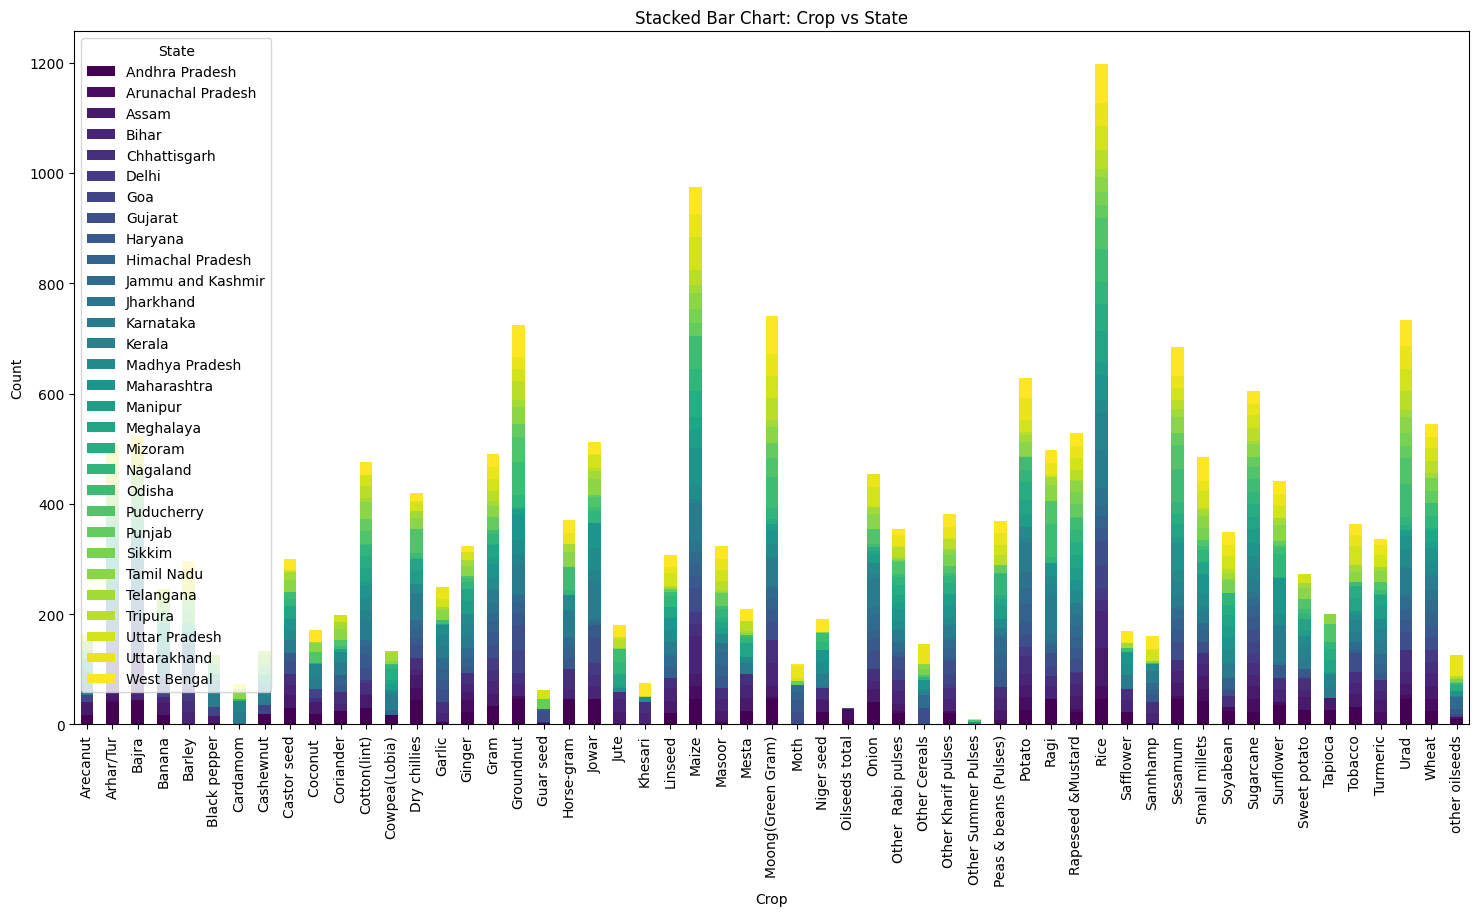

<Figure size 900x400 with 0 Axes>

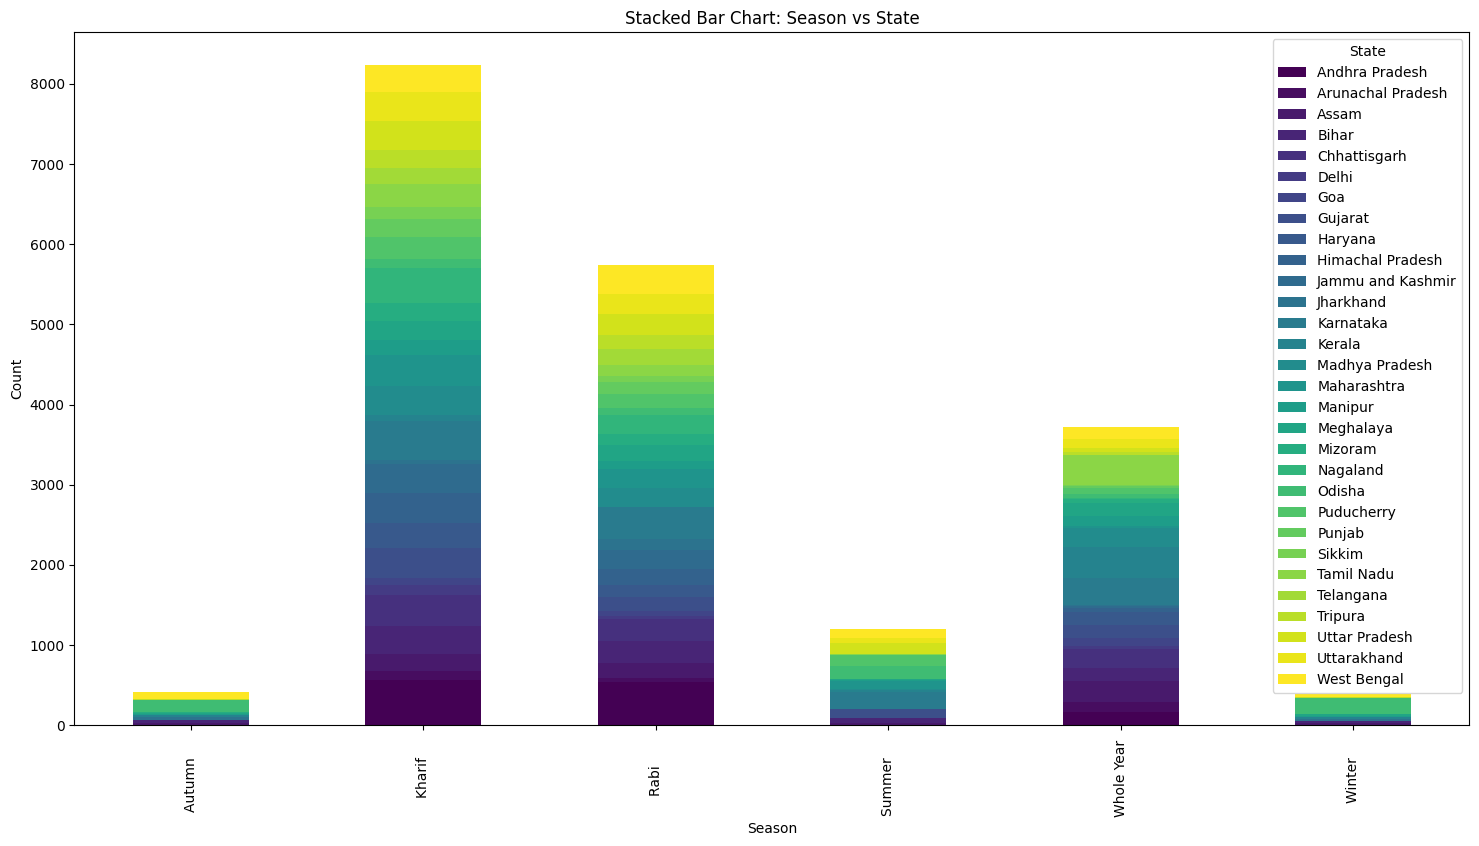

In [18]:
from matplotlib import legend

for i in range(len(categorical_cols)):
    for j in range(i+1, len(categorical_cols)):
        plt.figure(figsize=(9,4))
        crosstab = pd.crosstab(dataset[categorical_cols[i]], dataset[categorical_cols[j]])
        crosstab.plot(kind='bar', stacked=True, figsize=(18,9), colormap='viridis')
        plt.title(f'Stacked Bar Chart: {categorical_cols[i]} vs {categorical_cols[j]}')
        plt.ylabel('Count')
        # legend = plt.legend()
        # legend.remove()
        plt.show()

Starting with Pair Plot to visualise the relation ship between the Numerical Columns

FEATURE ENGINEERING

In [21]:
dataset

Crop  Crop_Year       Season              State      Area  \
0           Arecanut       1997  Whole Year               Assam   73814.0   
1          Arhar/Tur       1997  Kharif                   Assam    6637.0   
2        Castor seed       1997  Kharif                   Assam     796.0   
3           Coconut        1997  Whole Year               Assam   19656.0   
4       Cotton(lint)       1997  Kharif                   Assam    1739.0   
...              ...        ...          ...                ...       ...   
19684  Small millets       1998  Kharif                Nagaland    4000.0   
19685          Wheat       1998  Rabi                  Nagaland    1000.0   
19686          Maize       1997  Kharif       Jammu and Kashmir  310883.0   
19687           Rice       1997  Kharif       Jammu and Kashmir  275746.0   
19688          Wheat       1997  Rabi         Jammu and Kashmir  239344.0   

       Production  Annual_Rainfall   Fertilizer  Pesticide        Yield  
0           56708           2051.4   7024878.38   22882.34     0.796087  
1            4685           2051.4    631643.29    2057.47     0.710435  
2              22           2051.4     75755.32     246.76     0.238333  
3       126905000           2051.4   1870661.52    6093.36  5238.051739  
4             794           2051.4    165500.63     539.09     0.420909  
...           ...              ...          ...        ...          ...  
19684        2000           1498.0    395200.00    1160.00     0.500000  
19685        3000           1498.0     98800.00     290.00     3.000000  
19686      440900           1356.2  29586735.11   96373.73     1.285000  
19687        5488           1356.2  26242746.82   85481.26     0.016667  
19688      392160           1356.2  22778368.48   74196.64     1.261818  

[19689 rows x 10 columns]

In [22]:
categorical_cols

Index(['Crop', 'Season', 'State'], dtype='object')

In [24]:
from sklearn.preprocessing import LabelEncoder
label_encoder = LabelEncoder()

dataset2 = dataset.copy()
for col in categorical_cols:
    dataset2[col] = label_encoder.fit_transform(dataset[col])



In [25]:
dataset2

Crop  Crop_Year  Season  State      Area  Production  Annual_Rainfall  \
0         0       1997       4      2   73814.0       56708           2051.4   
1         1       1997       1      2    6637.0        4685           2051.4   
2         8       1997       1      2     796.0          22           2051.4   
3         9       1997       4      2   19656.0   126905000           2051.4   
4        11       1997       1      2    1739.0         794           2051.4   
...     ...        ...     ...    ...       ...         ...              ...   
19684    44       1998       1     19    4000.0        2000           1498.0   
19685    53       1998       2     19    1000.0        3000           1498.0   
19686    24       1997       1     10  310883.0      440900           1356.2   
19687    40       1997       1     10  275746.0        5488           1356.2   
19688    53       1997       2     10  239344.0      392160           1356.2   

        Fertilizer  Pesticide        Yield  
0       7024878.38   22882.34     0.796087  
1        631643.29    2057.47     0.710435  
2         75755.32     246.76     0.238333  
3       1870661.52    6093.36  5238.051739  
4        165500.63     539.09     0.420909  
...            ...        ...          ...  
19684    395200.00    1160.00     0.500000  
19685     98800.00     290.00     3.000000  
19686  29586735.11   96373.73     1.285000  
19687  26242746.82   85481.26     0.016667  
19688  22778368.48   74196.64     1.261818  

[19689 rows x 10 columns]

In [26]:
numerical_cols

Index(['Crop_Year', 'Area', 'Production', 'Annual_Rainfall', 'Fertilizer',
       'Pesticide', 'Yield'],
      dtype='object')

In [27]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
dataset2[numerical_cols] = scaler.fit_transform(dataset2[numerical_cols])

In [28]:
dataset2.head()

Crop  Crop_Year  Season  State      Area  Production  Annual_Rainfall  \
0     0  -1.866375       4      2 -0.144802   -0.062267         0.751197   
1     1  -1.866375       1      2 -0.236473   -0.062464         0.751197   
2     8  -1.866375       1      2 -0.244443   -0.062482         0.751197   
3     9  -1.866375       4      2 -0.218707    0.419954         0.751197   
4    11  -1.866375       1      2 -0.243157   -0.062479         0.751197   

   Fertilizer  Pesticide     Yield  
0   -0.179880  -0.121745 -0.090128  
1   -0.247217  -0.219385 -0.090225  
2   -0.253072  -0.227875 -0.090763  
3   -0.234167  -0.200462  5.872928  
4   -0.252127  -0.226504 -0.090555

In [29]:
def outlier_destroyer(data, numerical_cols, lower_percentile=0.05, upper_percentile=0.95):
    for col in numerical_cols:
        lower = data[col].quantile(lower_percentile)
        upper = data[col].quantile(upper_percentile)
        
        data[col] = data[col].clip(lower=lower, upper=upper)
    
    return data

In [30]:
dataset3 = outlier_destroyer(dataset2.copy(), numerical_cols)

In [32]:
dataset2.describe()

Crop     Crop_Year        Season         State          Area  \
count  19689.000000  1.968900e+04  19689.000000  19689.000000  1.968900e+04   
mean      29.357662 -1.516286e-14      2.037381     14.328813  2.598358e-17   
std       15.560857  1.000025e+00      1.222513      9.000461  1.000025e+00   
min        0.000000 -1.866375e+00      0.000000      0.000000 -2.455289e-01   
25%       17.000000 -7.891099e-01      1.000000      7.000000 -2.436328e-01   
50%       31.000000  1.342605e-01      2.000000     14.000000 -2.328155e-01   
75%       43.000000  9.037359e-01      3.000000     22.000000 -1.430310e-01   
max       54.000000  1.673211e+00      5.000000     29.000000  6.908772e+01   

         Production  Annual_Rainfall    Fertilizer     Pesticide         Yield  
count  19689.000000     1.968900e+04  1.968900e+04  1.968900e+04  1.968900e+04  
mean       0.000000    -3.464478e-17 -1.732239e-17 -1.010473e-17  1.876592e-17  
std        1.000025     1.000025e+00  1.000025e+00  1.000025e+00  1.000025e+00  
min       -0.062482    -1.391199e+00 -2.538692e-01 -2.290314e-01 -9.103436e-02  
25%       -0.062477    -6.084735e-01 -2.518895e-01 -2.273594e-01 -9.035121e-02  
50%       -0.062430    -2.327797e-01 -2.408625e-01 -2.176764e-01 -8.986162e-02  
75%       -0.062016     2.521087e-01 -1.485036e-01 -1.350637e-01 -8.831441e-02  
max       23.986163     6.261494e+00  5.067539e+01  7.361928e+01  2.393878e+01

In [31]:
dataset3.describe()

Crop     Crop_Year        Season         State          Area  \
count  19689.000000  19689.000000  19689.000000  19689.000000  19689.000000   
mean      29.357662      0.002915      2.037381     14.328813     -0.106467   
std       15.560857      0.993805      1.222513      9.000461      0.282314   
min        0.000000     -1.712480      0.000000      0.000000     -0.245472   
25%       17.000000     -0.789110      1.000000      7.000000     -0.243633   
50%       31.000000      0.134261      2.000000     14.000000     -0.232816   
75%       43.000000      0.903736      3.000000     22.000000     -0.143031   
max       54.000000      1.519316      5.000000     29.000000      0.850129   

         Production  Annual_Rainfall    Fertilizer     Pesticide         Yield  
count  19689.000000     19689.000000  19689.000000  19689.000000  19689.000000  
mean      -0.061317        -0.047046     -0.112433     -0.102130     -0.087394  
std        0.002907         0.804549      0.286510      0.259739      0.006155  
min       -0.062482        -1.107317     -0.253812     -0.228982     -0.090750  
25%       -0.062477        -0.608473     -0.251890     -0.227359     -0.090351  
50%       -0.062430        -0.232780     -0.240863     -0.217676     -0.089862  
75%       -0.062016         0.252109     -0.148504     -0.135064     -0.088314  
max       -0.050470         1.955400      0.857087      0.784006     -0.066082

Feature Selection

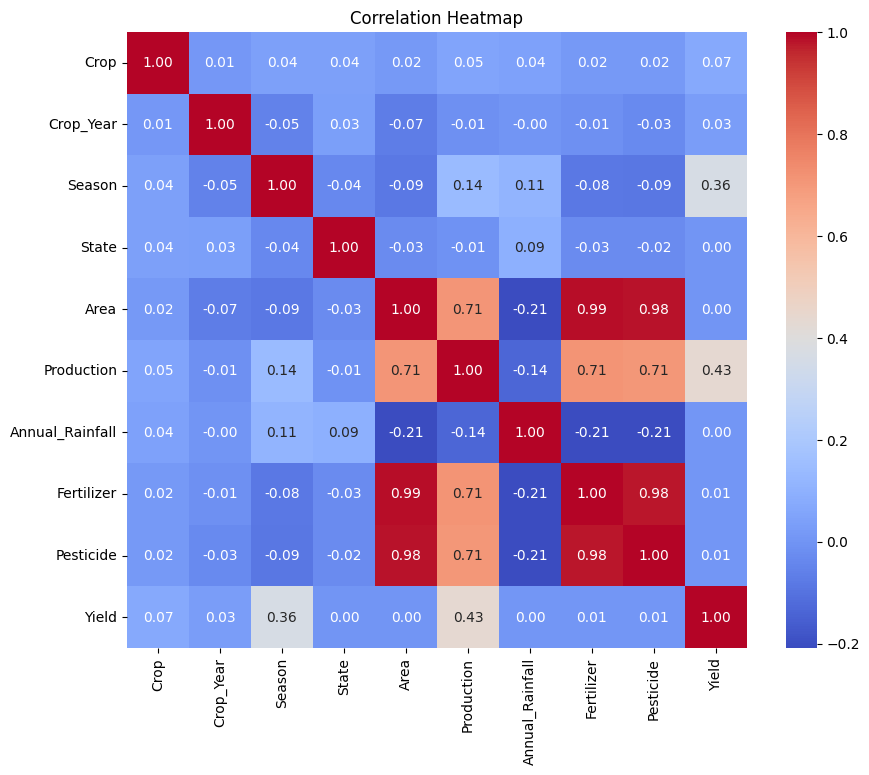

In [ ]:
correlation_matrix = dataset3.corr()
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Heatmap')
plt.show()

In [42]:
percentage = 0.9

high_corr = set()
for i in range(len(correlation_matrix.columns)):
    for j in range(i):
        if abs(correlation_matrix.iloc[i, j]) > percentage:
            colname = correlation_matrix.columns[i]
            high_corr.add(colname)

dataset4 = dataset3.drop(columns=high_corr)

print("Removed features:", high_corr)


Removed features: {'Fertilizer', 'Pesticide'}


In [43]:
dataset4

Crop  Crop_Year  Season  State      Area  Production  Annual_Rainfall  \
0         0   -1.71248       4      2 -0.144802   -0.062267         0.751197   
1         1   -1.71248       1      2 -0.236473   -0.062464         0.751197   
2         8   -1.71248       1      2 -0.244443   -0.062482         0.751197   
3         9   -1.71248       4      2 -0.218707   -0.050470         0.751197   
4        11   -1.71248       1      2 -0.243157   -0.062479         0.751197   
...     ...        ...     ...    ...       ...         ...              ...   
19684    44   -1.71248       1     19 -0.240071   -0.062475         0.073749   
19685    53   -1.71248       2     19 -0.244165   -0.062471         0.073749   
19686    24   -1.71248       1     10  0.178704   -0.060806        -0.099836   
19687    40   -1.71248       1     10  0.130756   -0.062461        -0.099836   
19688    53   -1.71248       2     10  0.081082   -0.060991        -0.099836   

          Yield  
0     -0.090128  
1     -0.090225  
2     -0.090750  
3     -0.066082  
4     -0.090555  
...         ...  
19684 -0.090465  
19685 -0.087619  
19686 -0.089571  
19687 -0.090750  
19688 -0.089598  

[19689 rows x 8 columns]

In [65]:
dataset4.to_csv('data/crop_yeild_cleaned.csv')